In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nssstats.plots import std_plot
from nssstats.plots import iqr_plot
from nssstats.plots import quadrant_plot, half_plot
from ipywidgets import interact, FloatSlider

In [2]:
espn_100 = pd.read_csv("espn_100_database.csv")
espn_100.head()

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,height,ht_inches,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,6'9'',81,255.0,NaN,99,UCLA,Pac-12,Power 5,YES,NO
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,6'5'',77,205.0,NaN,98,Indiana,Big Ten,Power 5,YES,YES
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,6'4'',76,195.0,NaN,98,USC,Pac-12,Power 5,YES,YES
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,6'8'',80,215.0,NaN,98,Duke,ACC,Power 5,YES,YES
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,6'4'',76,195.0,NaN,98,Memphis,CUSA,Mid Major,YES,YES


Let's see the number of players by position

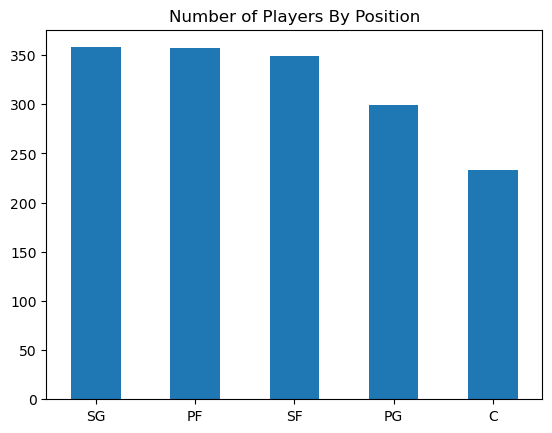

In [3]:
espn_100.pos.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of Players By Position');

Let's see the number of players by Type of High School

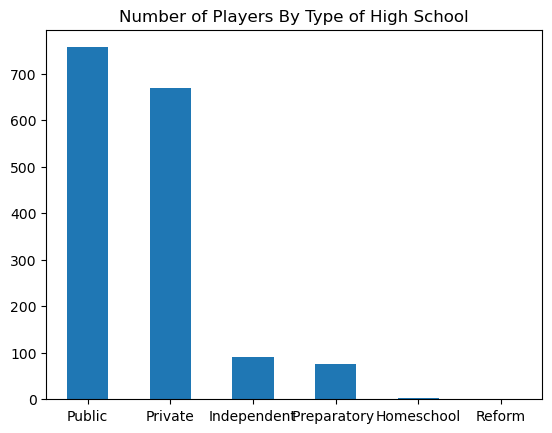

In [4]:
espn_100.hs_type.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of Players By Type of High School');

# Player Weight Statisitcs

In [5]:
espn_100.weight.mean()

200.2820189274448

In [6]:
espn_100.weight.median()

195.0

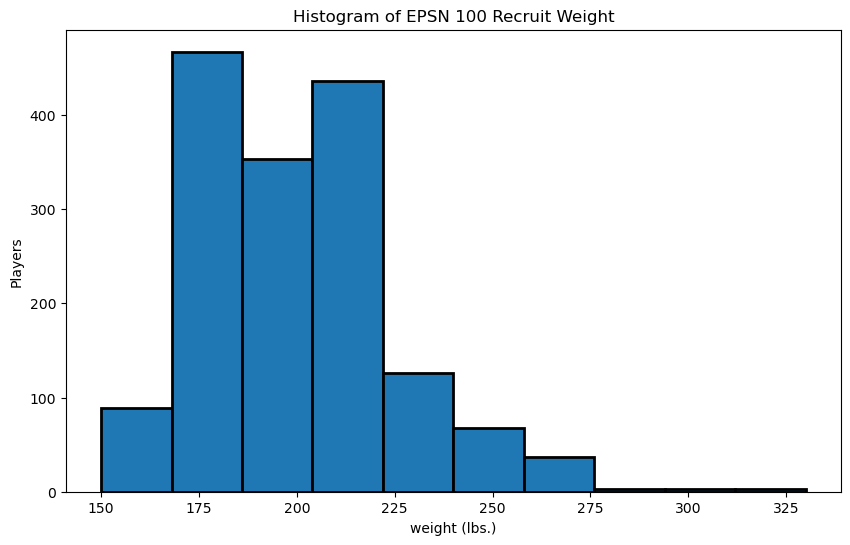

In [7]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data = espn_100,
    x = 'weight',
    edgecolor = 'black',
    linewidth = 2
);                              
plt.xlabel('weight (lbs.)')                            
plt.ylabel('Players')
plt.title('Histogram of EPSN 100 Recruit Weight');

Let's look at range in weight

In [8]:
espn_100.weight.max()

330.0

In [9]:
espn_100.nlargest(1,'weight')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,height,ht_inches,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc
478,2011,82,Sim Bhullar,Sim,Bhullar,C,"Toronto, Ontario, CAN",Huntington Prep,Preparatory,Catholic,...,7'4'',88,330.0,4.0,93,New Mexico St,WAC,Mid Major,NO,NO


In [10]:
espn_100.weight.min()

150.0

In [11]:
espn_100.nsmallest(1,'weight')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,height,ht_inches,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc
175,2008,76,Cashmere Wright,Cashmere,Wright,PG,"Savannah, GA",Urban Christian High School,Private,Christian,...,5'11'',71,150.0,NaN,93,Cincinnati,Big East,Other,NO,NO


In [12]:
espn_100.weight.max()- espn_100.weight.min()

180.0

Variance and Standard Devivation

In [13]:
espn_100['weight_deviation'] = espn_100.weight - espn_100.weight.mean()
espn_100.head()

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,ht_inches,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,81,255.0,NaN,99,UCLA,Pac-12,Power 5,YES,NO,54.717981
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,77,205.0,NaN,98,Indiana,Big Ten,Power 5,YES,YES,4.717981
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,76,195.0,NaN,98,USC,Pac-12,Power 5,YES,YES,-5.282019
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,80,215.0,NaN,98,Duke,ACC,Power 5,YES,YES,14.717981
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,76,195.0,NaN,98,Memphis,CUSA,Mid Major,YES,YES,-5.282019


In [14]:
espn_100.weight.std()

24.938344901504845

In [15]:
espn_100['weight_deviation'].mean()

-7.172671149628771e-16

In [16]:
espn_100['squared_weight_deviation'] = espn_100['weight_deviation']**2
espn_100

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,weight,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,255.0,NaN,99,UCLA,Pac-12,Power 5,YES,NO,54.717981,2994.057453
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,205.0,NaN,98,Indiana,Big Ten,Power 5,YES,YES,4.717981,22.259345
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,195.0,NaN,98,USC,Pac-12,Power 5,YES,YES,-5.282019,27.899724
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,215.0,NaN,98,Duke,ACC,Power 5,YES,YES,14.717981,216.618967
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,195.0,NaN,98,Memphis,CUSA,Mid Major,YES,YES,-5.282019,27.899724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2022,96,Tyler Nickel,Tyler,Nickel,PF,"Elkton, VA",East Rockingham High School,Public,Public,...,215.0,4.0,82,N Carolina,ACC,Power 5,NO,NO,14.717981,216.618967
1592,2022,97,Christian Watson,Christian,Watson,SF,"Washington, DC",St. John's College High School,Private,Catholic,...,180.0,4.0,82,Miami,ACC,Power 5,NO,NO,-20.282019,411.360292
1593,2022,98,Desmond Claude,Desmond,Claude,SG,"Putnam, CT",Putnam Science Academy,Private,Preparatory,...,190.0,4.0,82,Xavier,Big East,Other,NO,NO,-10.282019,105.719913
1594,2022,99,Alphonzo Billups,Alphonzo,Billups,SF,"Richmond, VA",Varina High School,Public,Public,...,195.0,4.0,82,VCU,A-10,Mid Major,NO,NO,-5.282019,27.899724


Population Standard Deviation

In [17]:
np.sqrt(espn_100['squared_weight_deviation'].mean())

24.93047667449035

In [18]:
espn_100.weight.var(ddof = 0)

621.5286672173108

In [19]:
espn_100.weight.std(ddof = 0)

24.930476674490418

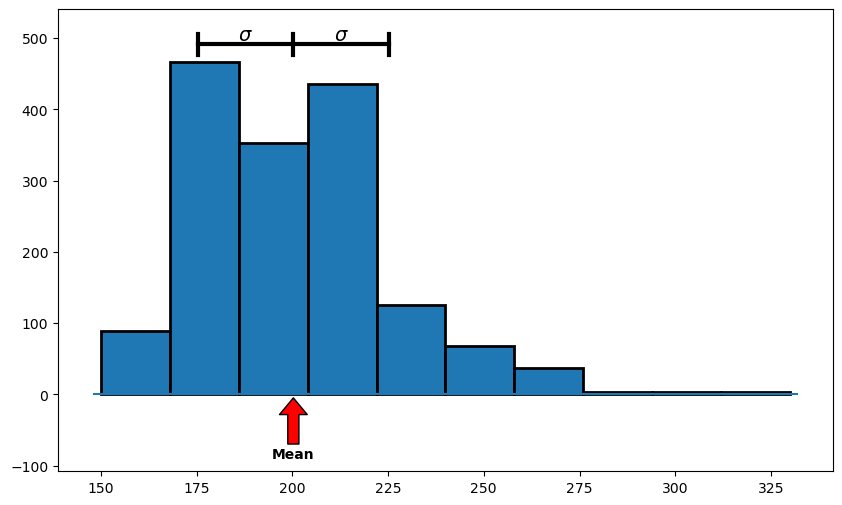

In [20]:
plt.figure(figsize = (10,6))

std_plot(espn_100.weight, edgecolor = 'black', linewidth = 2)

z-scores

In [21]:
espn_100['weight_z-score'] = (espn_100.weight - espn_100.weight.mean()) / espn_100.weight.std(ddof = 0)

In [22]:
espn_100['weight_z-score'].std()

1.0003156067618355

Let's look at height z-scores for Kevin Love

In [23]:
espn_100.loc[(espn_100.player == 'Kevin Love')]

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,NaN,99,UCLA,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823


Quartiles and Quantiles/Percentiles

In [24]:
espn_100.weight.quantile(q = 0.25)

180.0

In [25]:
espn_100.weight.quantile(q = 0.5)

195.0

In [26]:
espn_100.weight.quantile(q = 0.75)

215.0

In [27]:
espn_100.weight.describe()

count    1585.000000
mean      200.282019
std        24.938345
min       150.000000
25%       180.000000
50%       195.000000
75%       215.000000
max       330.000000
Name: weight, dtype: float64

Interquartile Range

In [28]:
espn_100.weight.quantile(q = 0.75) - espn_100.weight.quantile(q = 0.25)

35.0

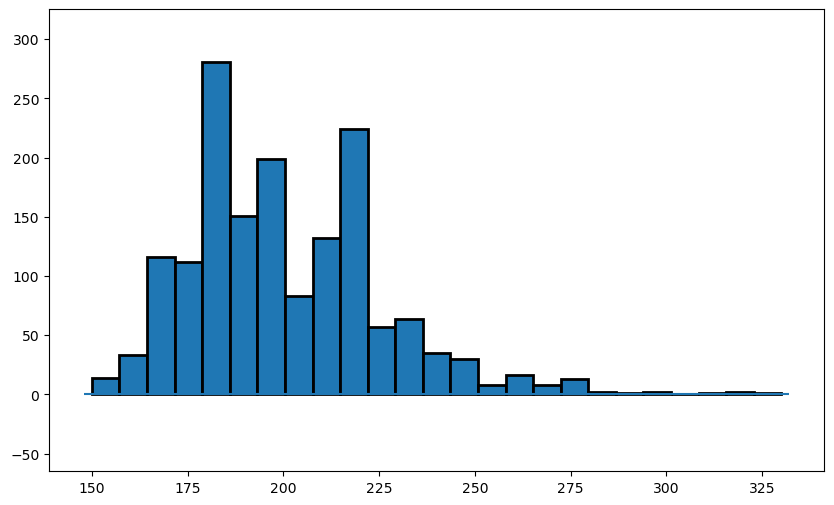

In [29]:
plt.figure(figsize = (10,6))

iqr_plot(espn_100.weight, bins = 25, edgecolor = 'black', linewidth = 2)

Observing Outliers in the Dataset

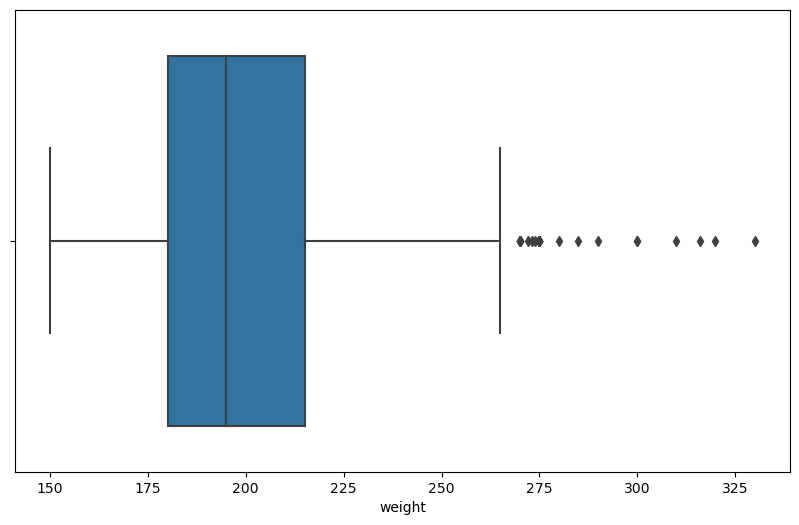

In [30]:
plt.figure(figsize = (10,6))
sns.boxplot(x = espn_100.weight);

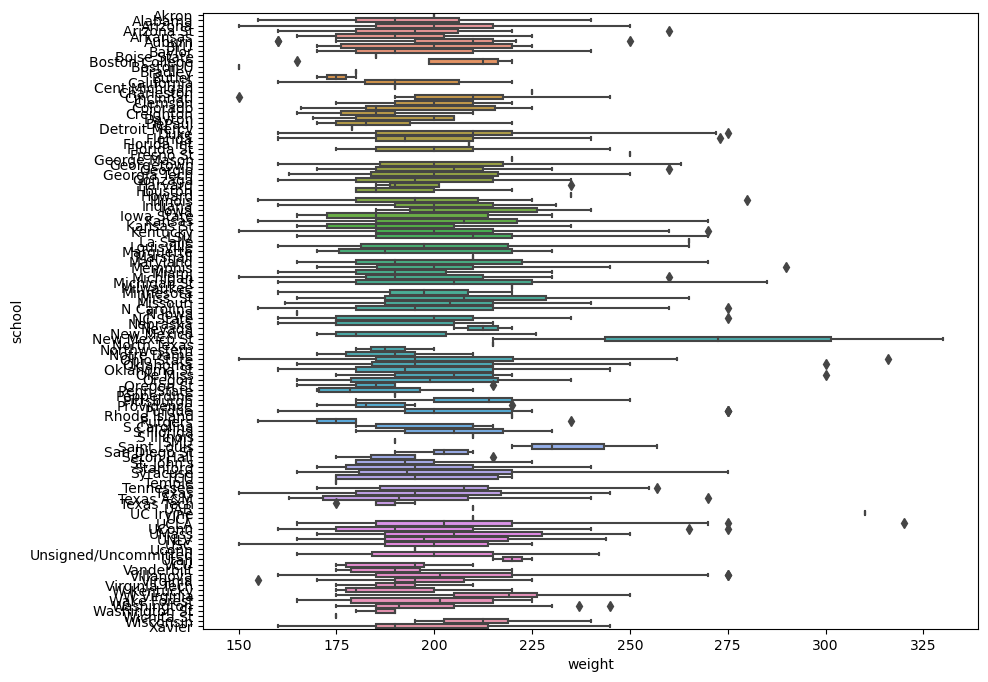

In [31]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('school'), x = "weight", y = "school");

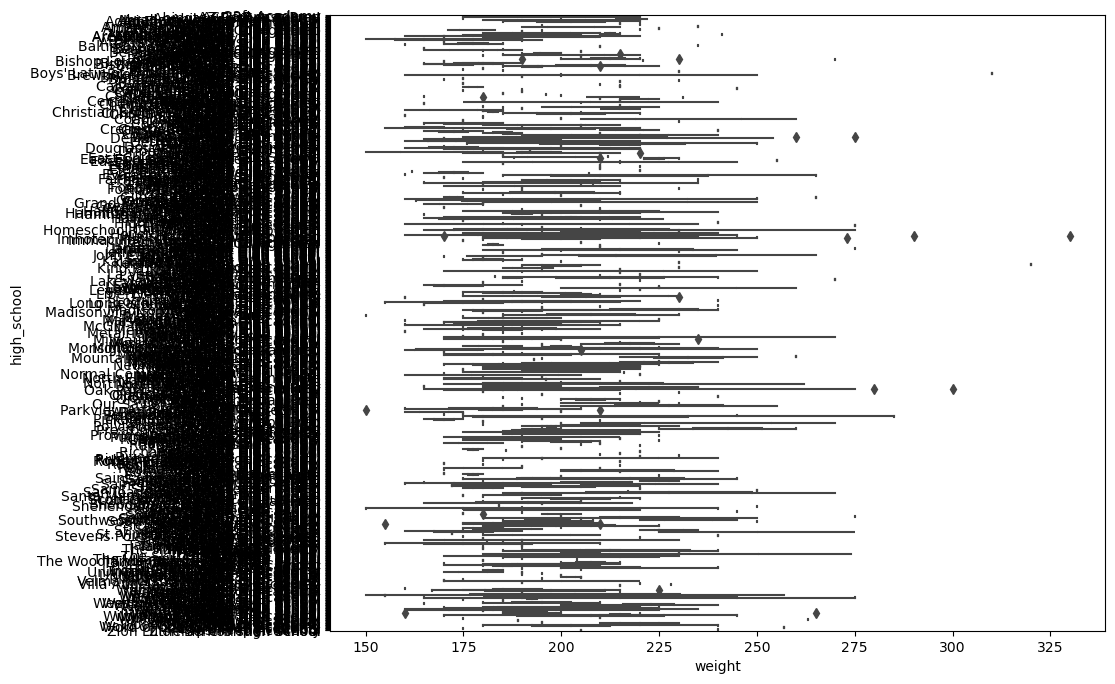

In [32]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('high_school'), x = "weight", y = "high_school");

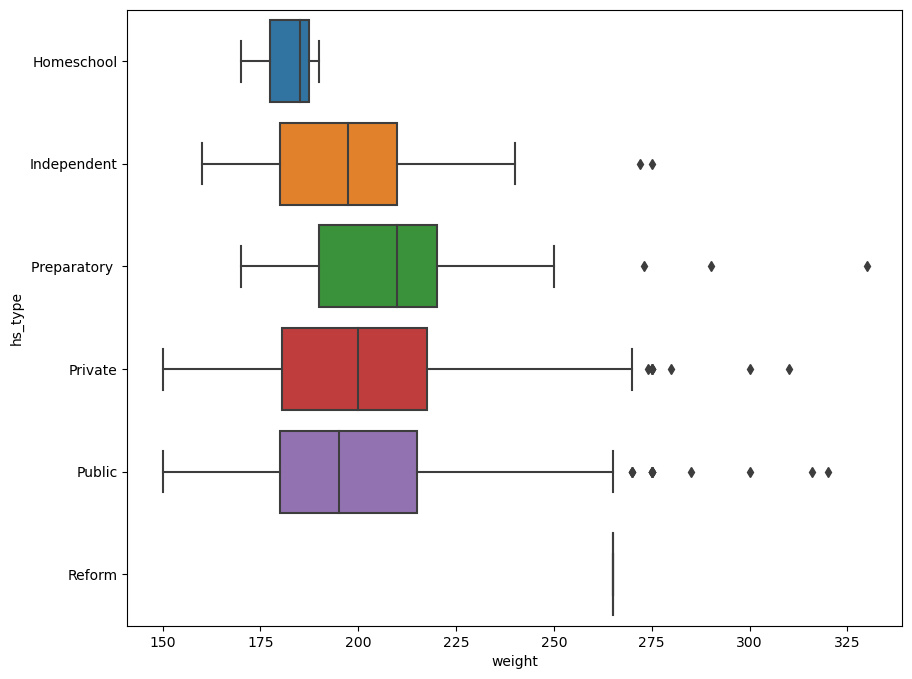

In [33]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_type'), x = "weight", y = "hs_type");

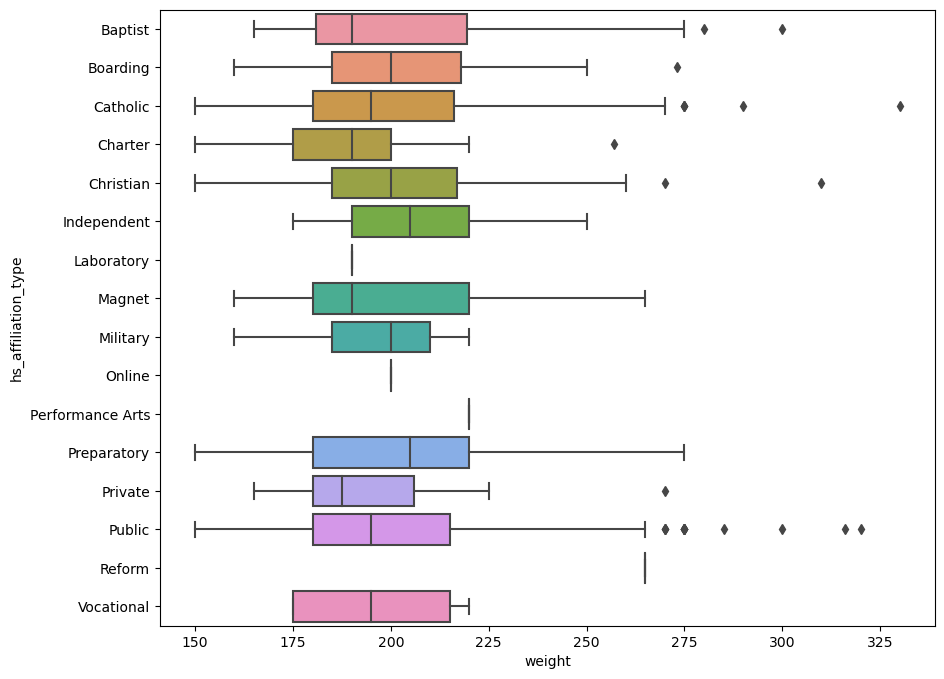

In [34]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_affiliation_type'), x = "weight", y = "hs_affiliation_type");

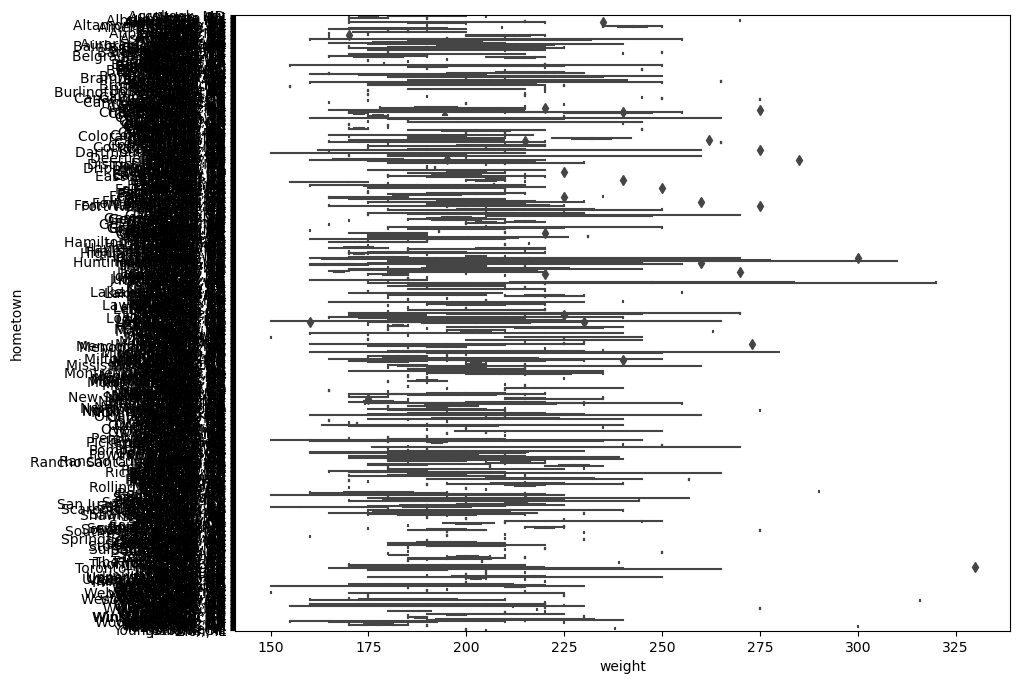

In [35]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hometown'), x = "weight", y = "hometown");

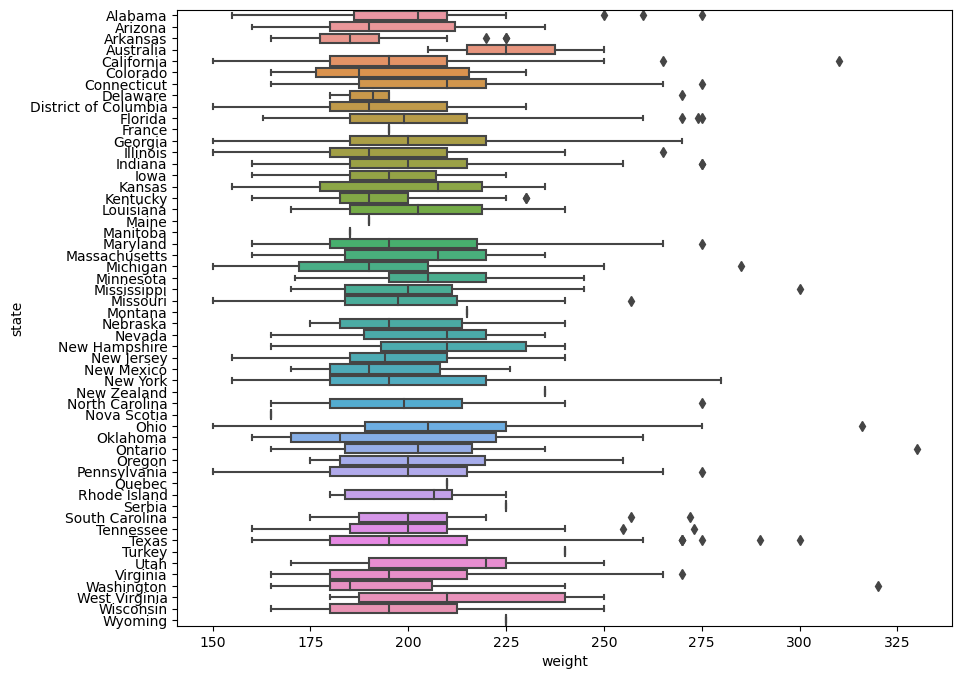

In [36]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('state'), x = "weight", y = "state");

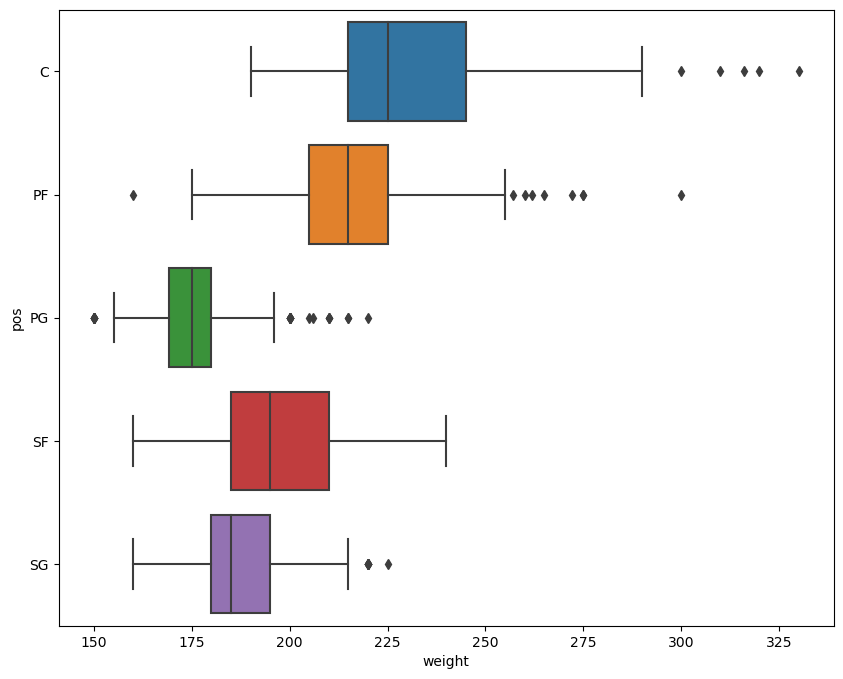

In [37]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('pos'), x = "weight", y = "pos");

# Player Height Statisitcs

In [38]:
espn_100.ht_inches.mean()

77.94172932330827

In [39]:
espn_100.ht_inches.median()

78.0

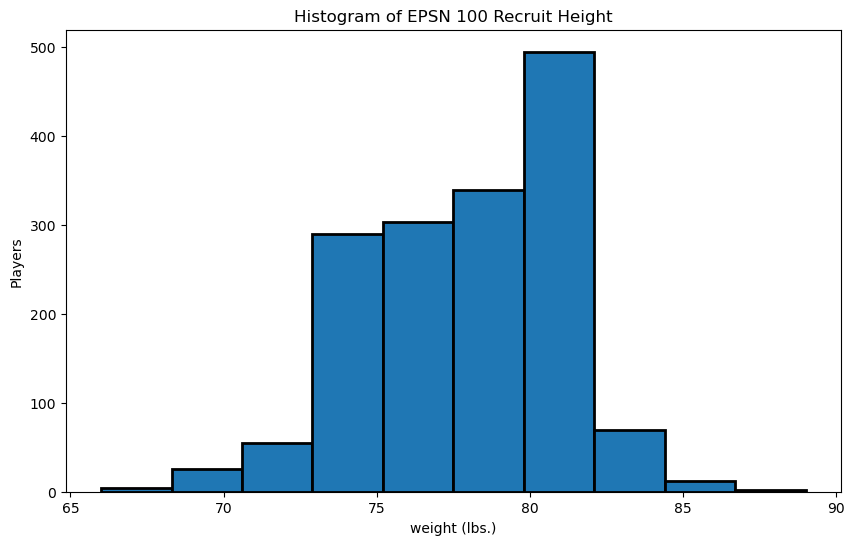

In [40]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data = espn_100,
    x = 'ht_inches',
    edgecolor = 'black',
    linewidth = 2
);                              
plt.xlabel('weight (lbs.)')                            
plt.ylabel('Players')
plt.title('Histogram of EPSN 100 Recruit Height');

Let's look at the range in height

In [41]:
espn_100.ht_inches.max()

89

In [42]:
espn_100.nlargest(1,'ht_inches')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score
670,2013,74,Mamadou Ndiaye,Mamadou,Ndiaye,C,"Huntington Beach, CA",Brethren Christian High School,Private,Christian,...,4.0,85,UC Irvine,Big West,Mid Major,NO,NO,109.717981,12038.035371,4.400958


In [43]:
espn_100.ht_inches.min()

66

In [44]:
espn_100.nsmallest(1,'ht_inches')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,stars,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score
174,2008,75,Erving Walker,Erving,Walker,PG,"Middle Village, NY",Christ the King High School,Private,Catholic,...,NaN,93,Florida,SEC,Power 5,NO,NO,-40.282019,1622.641049,-1.615774


In [45]:
espn_100.ht_inches.max()- espn_100.ht_inches.min()

23

Variance and Standard Deviation

In [46]:
espn_100['height_deviation'] = espn_100.ht_inches - espn_100.ht_inches.mean()
espn_100.head()

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,grade,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,99,UCLA,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823,3.058271
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,98,Indiana,Big Ten,Power 5,YES,YES,4.717981,22.259345,0.189246,-0.941729
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,98,USC,Pac-12,Power 5,YES,YES,-5.282019,27.899724,-0.211870,-1.941729
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,98,Duke,ACC,Power 5,YES,YES,14.717981,216.618967,0.590361,2.058271
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,98,Memphis,CUSA,Mid Major,YES,YES,-5.282019,27.899724,-0.211870,-1.941729


In [47]:
espn_100.ht_inches.std()

3.238249152216237

In [48]:
espn_100['height_deviation'].mean()

4.701335394502918e-15

In [49]:
espn_100['squared_height_deviation'] = espn_100['height_deviation']**2
espn_100

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,school,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,UCLA,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823,3.058271,9.353020
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,Indiana,Big Ten,Power 5,YES,YES,4.717981,22.259345,0.189246,-0.941729,0.886854
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,USC,Pac-12,Power 5,YES,YES,-5.282019,27.899724,-0.211870,-1.941729,3.770313
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,Duke,ACC,Power 5,YES,YES,14.717981,216.618967,0.590361,2.058271,4.236478
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,Memphis,CUSA,Mid Major,YES,YES,-5.282019,27.899724,-0.211870,-1.941729,3.770313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2022,96,Tyler Nickel,Tyler,Nickel,PF,"Elkton, VA",East Rockingham High School,Public,Public,...,N Carolina,ACC,Power 5,NO,NO,14.717981,216.618967,0.590361,2.058271,4.236478
1592,2022,97,Christian Watson,Christian,Watson,SF,"Washington, DC",St. John's College High School,Private,Catholic,...,Miami,ACC,Power 5,NO,NO,-20.282019,411.360292,-0.813543,0.058271,0.003395
1593,2022,98,Desmond Claude,Desmond,Claude,SG,"Putnam, CT",Putnam Science Academy,Private,Preparatory,...,Xavier,Big East,Other,NO,NO,-10.282019,105.719913,-0.412428,-0.941729,0.886854
1594,2022,99,Alphonzo Billups,Alphonzo,Billups,SF,"Richmond, VA",Varina High School,Public,Public,...,VCU,A-10,Mid Major,NO,NO,-5.282019,27.899724,-0.211870,0.058271,0.003395


Population Standard Deviation

In [50]:
np.sqrt(espn_100['squared_height_deviation'].mean())

3.2372345041724744

In [51]:
espn_100.ht_inches.var(ddof = 0)

10.479687235004725

In [52]:
espn_100.ht_inches.std(ddof = 0)

3.237234504172462

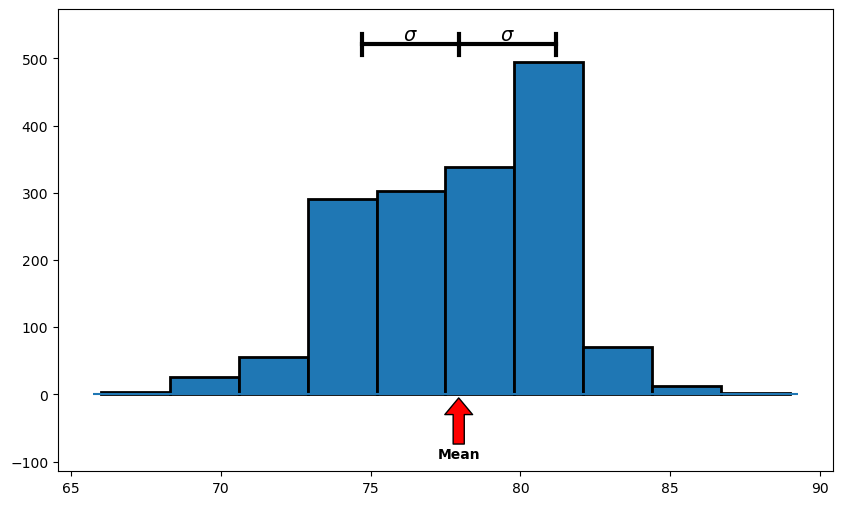

In [53]:
plt.figure(figsize = (10,6))

std_plot(espn_100.ht_inches, edgecolor = 'black', linewidth = 2)

z-scores

In [54]:
espn_100['height_z-score'] = (espn_100.ht_inches - espn_100.ht_inches.mean()) / espn_100.ht_inches.std(ddof = 0)

In [55]:
espn_100['height_z-score'].std()

1.0003134305044832

Let's look at height z-scores for Kevin Love

In [56]:
espn_100.loc[(espn_100.player == 'Kevin Love')]

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation,height_z-score
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823,3.058271,9.35302,0.944717


Quartiles and Quantiles/Percentiles

In [57]:
espn_100.ht_inches.quantile(q = 0.25)

76.0

In [58]:
espn_100.ht_inches.quantile(q = 0.5)

78.0

In [59]:
espn_100.ht_inches.quantile(q = 0.75)

80.0

In [60]:
espn_100.ht_inches.describe()

count    1596.000000
mean       77.941729
std         3.238249
min        66.000000
25%        76.000000
50%        78.000000
75%        80.000000
max        89.000000
Name: ht_inches, dtype: float64

Interquartile Range

In [61]:
espn_100.ht_inches.quantile(q = 0.75) - espn_100.ht_inches.quantile(q = 0.25)

4.0

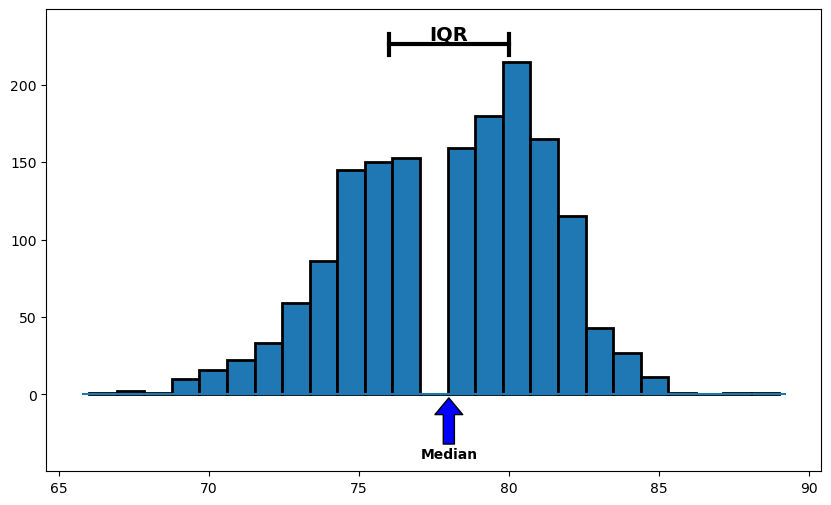

In [62]:
plt.figure(figsize = (10,6))

iqr_plot(espn_100.ht_inches, bins = 25, edgecolor = 'black', linewidth = 2)

Observing Outliers in the Dataset

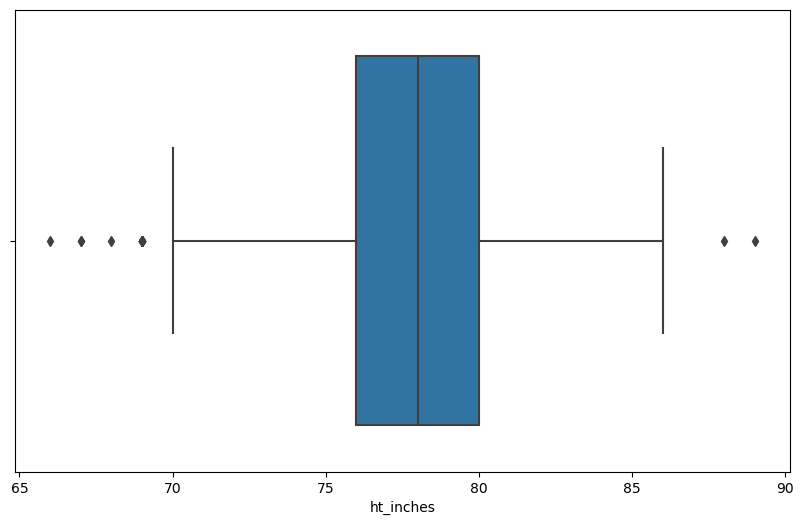

In [63]:
plt.figure(figsize = (10,6))
sns.boxplot(x = espn_100.ht_inches);

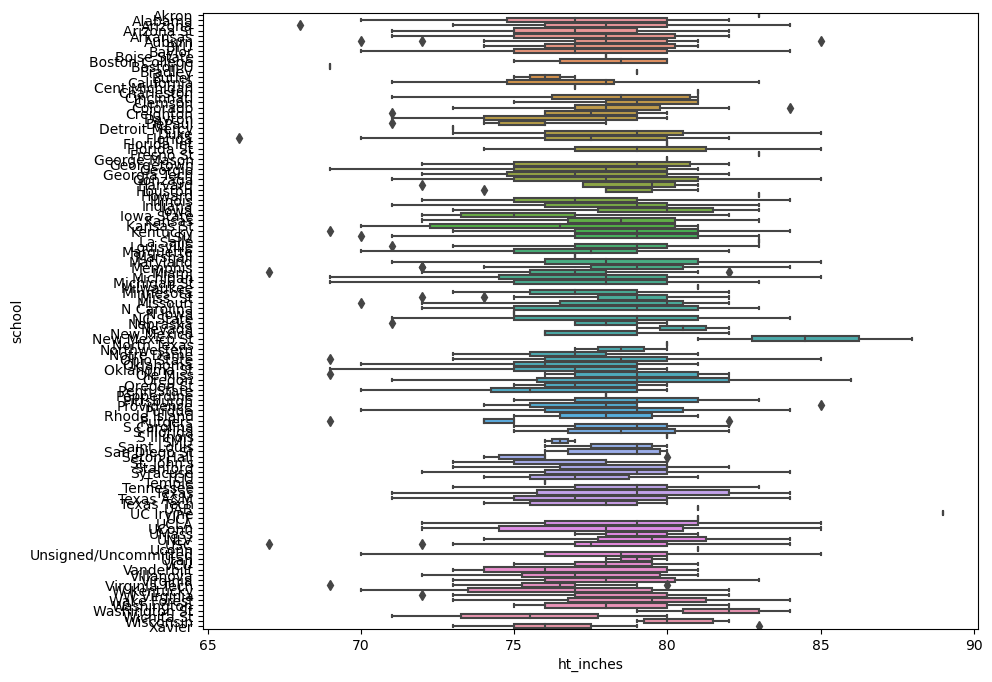

In [64]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('school'), x = "ht_inches", y = "school");

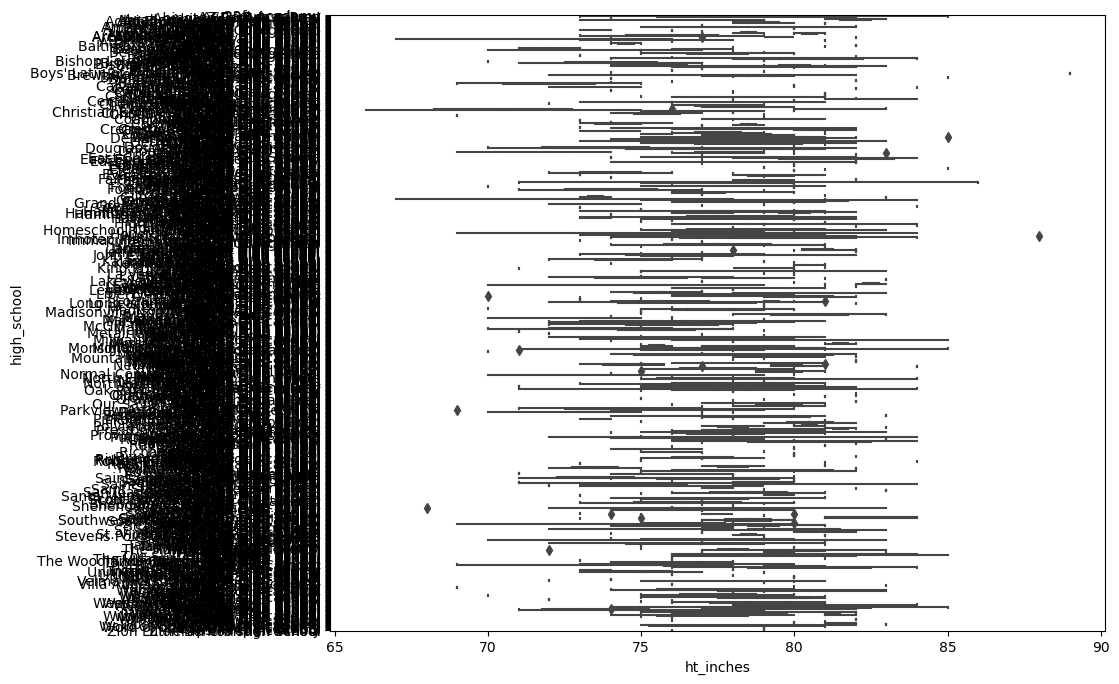

In [65]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('high_school'), x = "ht_inches", y = "high_school");

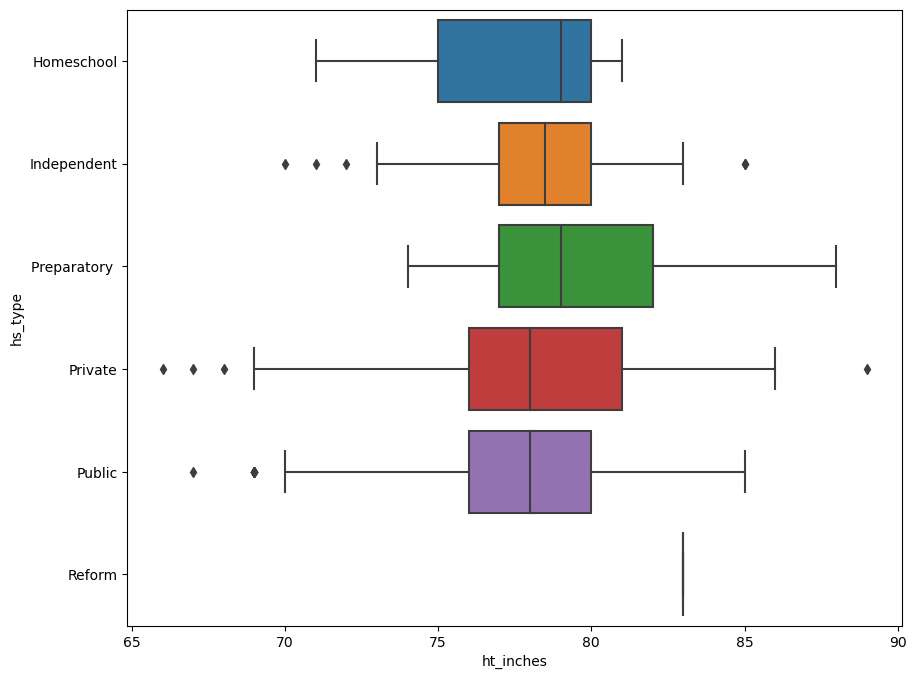

In [66]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_type'), x = "ht_inches", y = "hs_type");

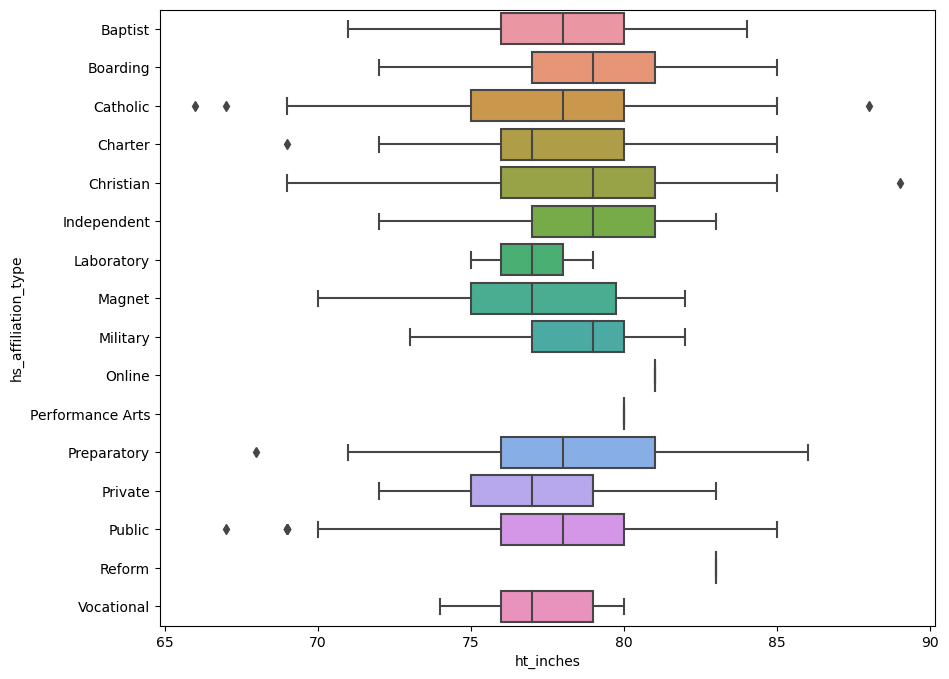

In [67]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_affiliation_type'), x = "ht_inches", y = "hs_affiliation_type");

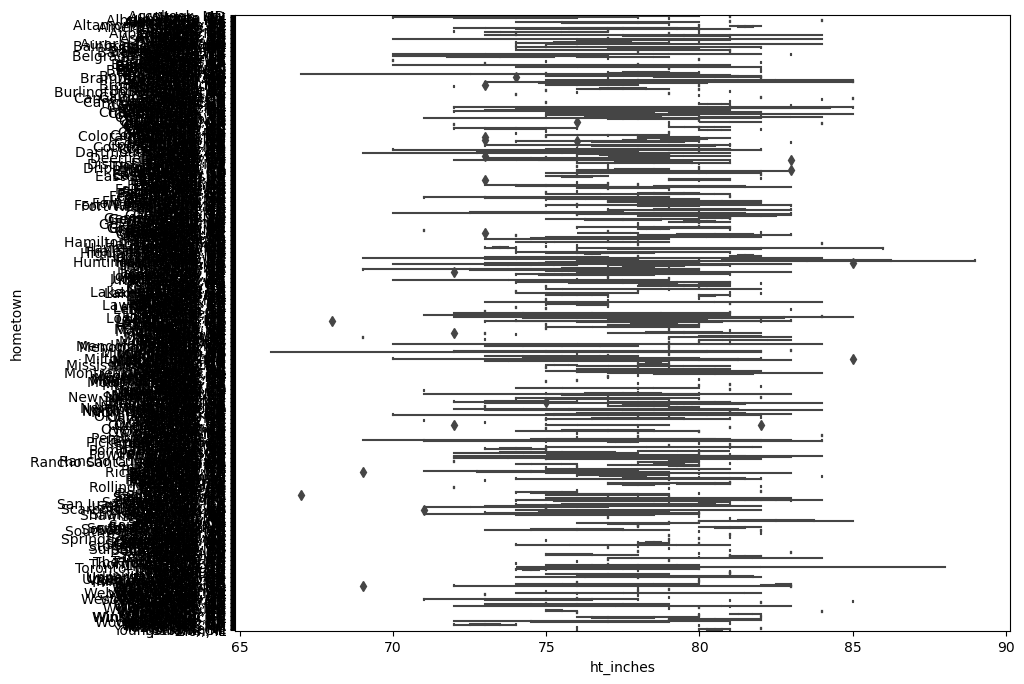

In [68]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hometown'), x = "ht_inches", y = "hometown");

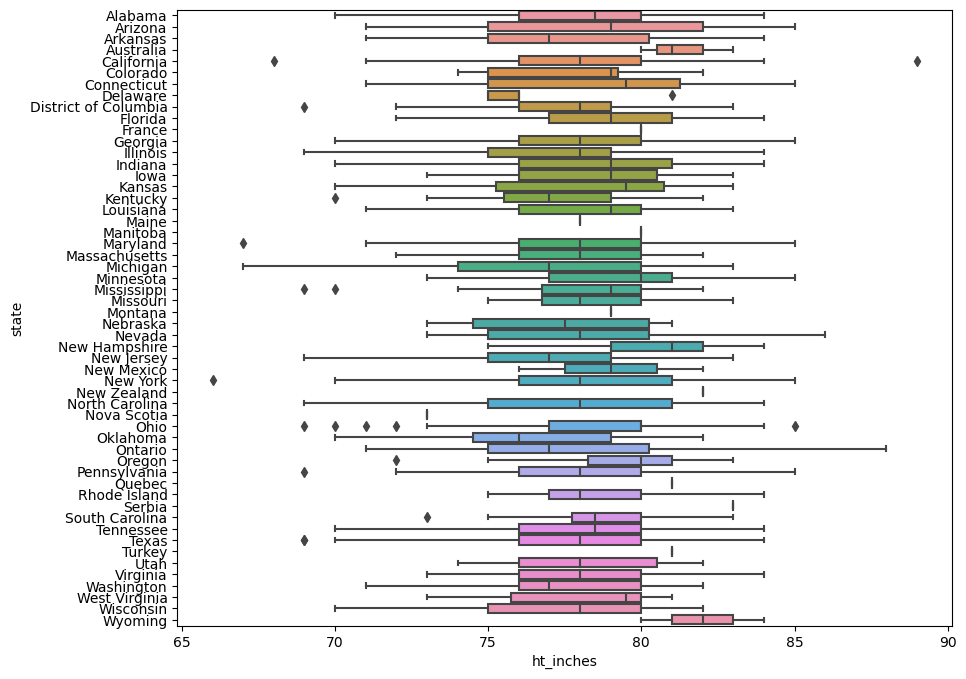

In [69]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('state'), x = "ht_inches", y = "state");

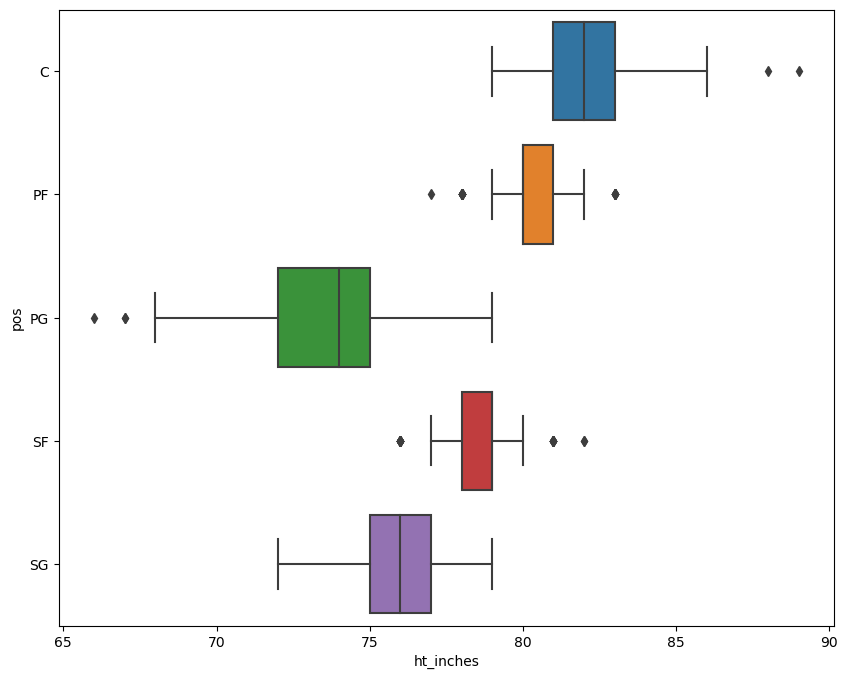

In [70]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('pos'), x = "ht_inches", y = "pos");

# Player Grade Statistics

In [71]:
espn_100.grade.mean()

90.08646616541354

In [72]:
espn_100.grade.median()

91.0

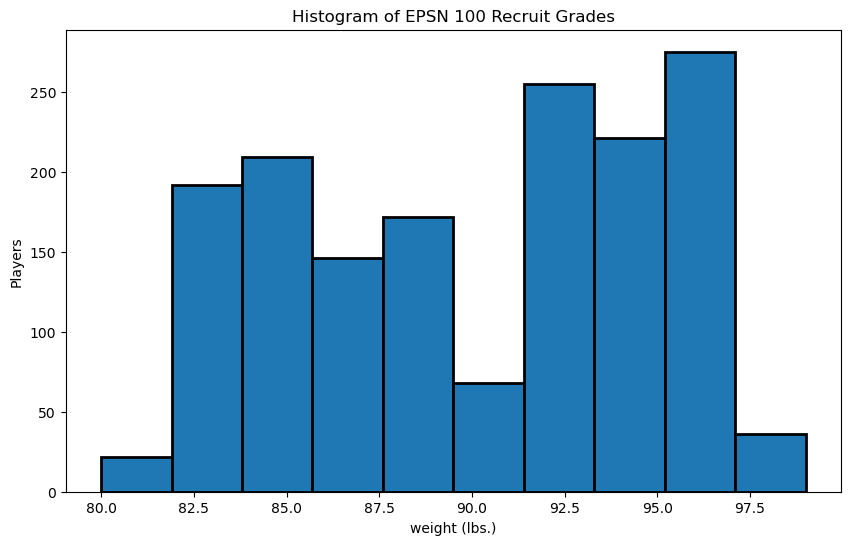

In [73]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data = espn_100,
    x = 'grade',
    edgecolor = 'black',
    linewidth = 2
);                              
plt.xlabel('weight (lbs.)')                            
plt.ylabel('Players')
plt.title('Histogram of EPSN 100 Recruit Grades');

Let's look at the range in grade

In [74]:
espn_100.grade.max()

99

In [75]:
espn_100.nlargest(1,'grade')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation,height_z-score
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,Pac-12,Power 5,YES,NO,54.717981,2994.057453,2.194823,3.058271,9.35302,0.944717


In [76]:
espn_100.grade.min()

80

In [77]:
espn_100.nsmallest(1,'grade')

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,conference,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation,height_z-score
791,2014,94,Elijah Stewart,Elijah,Stewart,SG,"Los Angeles, CA",Westchester High School,Public,Magnet,...,Pac-12,Power 5,NO,NO,-35.282019,1244.82086,-1.415216,-0.941729,0.886854,-0.290906


In [78]:
espn_100.grade.max()- espn_100.grade.min()

19

Variance and Standard Deviation

In [79]:
espn_100['grade_deviation'] = espn_100.grade - espn_100.grade.mean()
espn_100.head()

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,conference_type,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation,height_z-score,grade_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,Power 5,YES,NO,54.717981,2994.057453,2.194823,3.058271,9.353020,0.944717,8.913534
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,Power 5,YES,YES,4.717981,22.259345,0.189246,-0.941729,0.886854,-0.290906,7.913534
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,Power 5,YES,YES,-5.282019,27.899724,-0.211870,-1.941729,3.770313,-0.599811,7.913534
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,Power 5,YES,YES,14.717981,216.618967,0.590361,2.058271,4.236478,0.635811,7.913534
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,Mid Major,YES,YES,-5.282019,27.899724,-0.211870,-1.941729,3.770313,-0.599811,7.913534


In [80]:
espn_100.grade.std()

5.1013593166159605

In [81]:
espn_100['grade_deviation'].mean()

-6.268447192670558e-15

In [82]:
espn_100['squared_grade_deviation'] = espn_100['grade_deviation']**2
espn_100

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,mcdonalds_aa,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation,height_z-score,grade_deviation,squared_grade_deviation
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,YES,NO,54.717981,2994.057453,2.194823,3.058271,9.353020,0.944717,8.913534,79.451085
1,2007,2,Eric Gordon,Eric,Gordon,SG,"Indianapolis, IN",North Central High School,Public,Public,...,YES,YES,4.717981,22.259345,0.189246,-0.941729,0.886854,-0.290906,7.913534,62.624018
2,2007,3,O.J. Mayo,O.J.,Mayo,SG,"Huntington, WV",Huntington High School,Public,Public,...,YES,YES,-5.282019,27.899724,-0.211870,-1.941729,3.770313,-0.599811,7.913534,62.624018
3,2007,4,Kyle Singler,Kyle,Singler,SF,"Medford, OR",Camden Catholic High School,Private,Catholic,...,YES,YES,14.717981,216.618967,0.590361,2.058271,4.236478,0.635811,7.913534,62.624018
4,2007,5,Derrick Rose,Derrick,Rose,PG,"Chicago, IL",Simeon Career Academy,Public,Vocational,...,YES,YES,-5.282019,27.899724,-0.211870,-1.941729,3.770313,-0.599811,7.913534,62.624018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2022,96,Tyler Nickel,Tyler,Nickel,PF,"Elkton, VA",East Rockingham High School,Public,Public,...,NO,NO,14.717981,216.618967,0.590361,2.058271,4.236478,0.635811,-8.086466,65.390935
1592,2022,97,Christian Watson,Christian,Watson,SF,"Washington, DC",St. John's College High School,Private,Catholic,...,NO,NO,-20.282019,411.360292,-0.813543,0.058271,0.003395,0.018000,-8.086466,65.390935
1593,2022,98,Desmond Claude,Desmond,Claude,SG,"Putnam, CT",Putnam Science Academy,Private,Preparatory,...,NO,NO,-10.282019,105.719913,-0.412428,-0.941729,0.886854,-0.290906,-8.086466,65.390935
1594,2022,99,Alphonzo Billups,Alphonzo,Billups,SF,"Richmond, VA",Varina High School,Public,Public,...,NO,NO,-5.282019,27.899724,-0.211870,0.058271,0.003395,0.018000,-8.086466,65.390935


Population Standard Deviation

In [83]:
np.sqrt(espn_100['squared_grade_deviation'].mean())

5.09976089598558

In [84]:
espn_100.grade.var(ddof = 0)

26.007561196223698

In [85]:
espn_100.grade.std(ddof = 0)

5.099760895985585

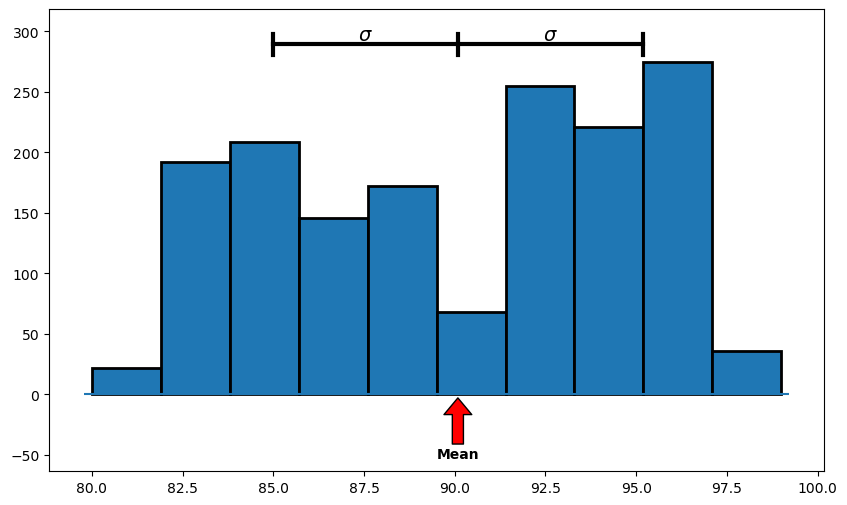

In [86]:
plt.figure(figsize = (10,6))

std_plot(espn_100.grade, edgecolor = 'black', linewidth = 2)

In [87]:
espn_100['grade_z-score'] = (espn_100.grade - espn_100.grade.mean()) / espn_100.grade.std(ddof = 0)

In [88]:
espn_100['grade_z-score'].std()

1.0003134305044823

Let's look at the grade z-scores for Kevin Love

In [89]:
espn_100.loc[(espn_100.player == 'Kevin Love')]

,class,rank,player,first_name,last_name,pos,hometown,high_school,hs_type,hs_affiliation_type,...,jbc,weight_deviation,squared_weight_deviation,weight_z-score,height_deviation,squared_height_deviation,height_z-score,grade_deviation,squared_grade_deviation,grade_z-score
0,2007,1,Kevin Love,Kevin,Love,C,"Lake Oswego, OR",Lake Oswego High School,Public,Public,...,NO,54.717981,2994.057453,2.194823,3.058271,9.35302,0.944717,8.913534,79.451085,1.747834


Quartiles and Quantiles/Percentiles

In [90]:
espn_100.grade.quantile(q = 0.25)

85.0

In [91]:
espn_100.grade.quantile(q = 0.5)

91.0

In [92]:
espn_100.grade.quantile(q = 0.75)

95.0

In [93]:
espn_100.grade.describe()

count    1596.000000
mean       90.086466
std         5.101359
min        80.000000
25%        85.000000
50%        91.000000
75%        95.000000
max        99.000000
Name: grade, dtype: float64

Interquartile Range

In [94]:
espn_100.grade.quantile(q = 0.75) - espn_100.grade.quantile(q = 0.25)

10.0

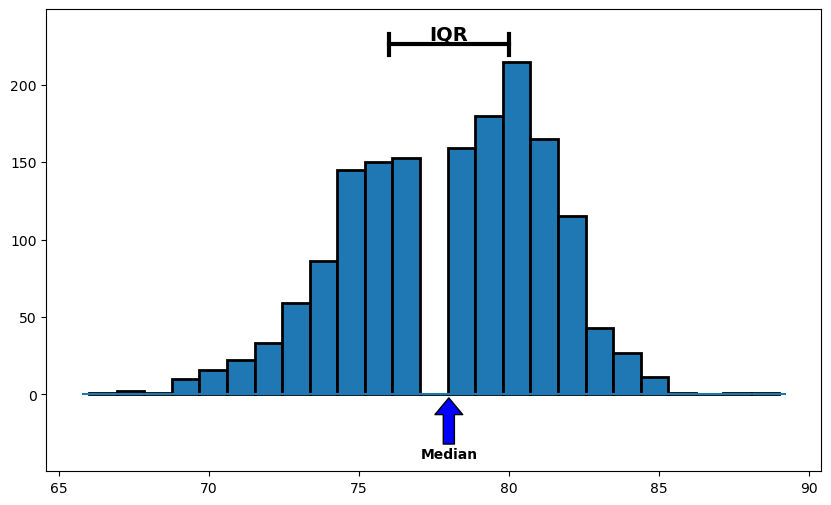

In [95]:
plt.figure(figsize = (10,6))

iqr_plot(espn_100.ht_inches, bins = 25, edgecolor = 'black', linewidth = 2)

Observing Outliers in the Dataset

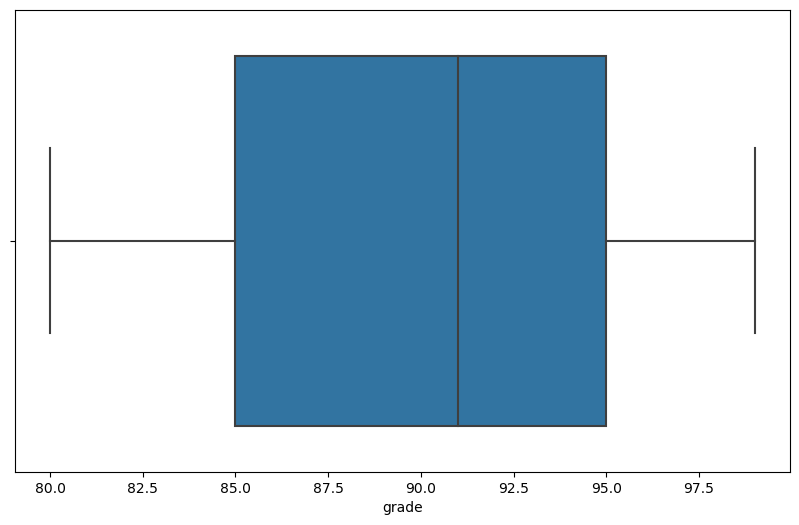

In [96]:
plt.figure(figsize = (10,6))
sns.boxplot(x = espn_100.grade);

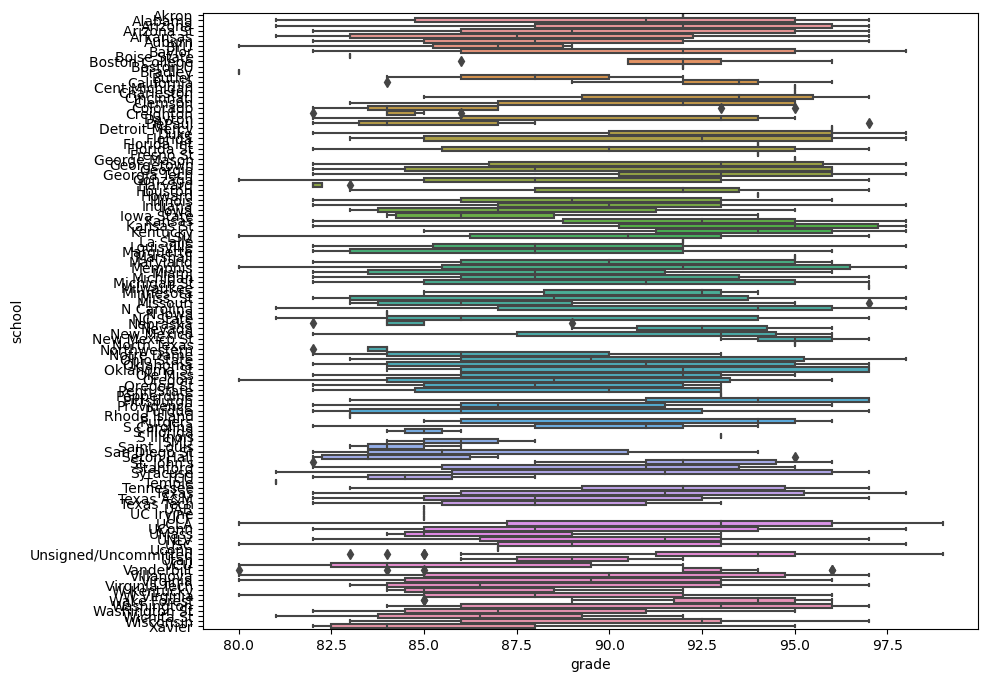

In [97]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('school'), x = "grade", y = "school");

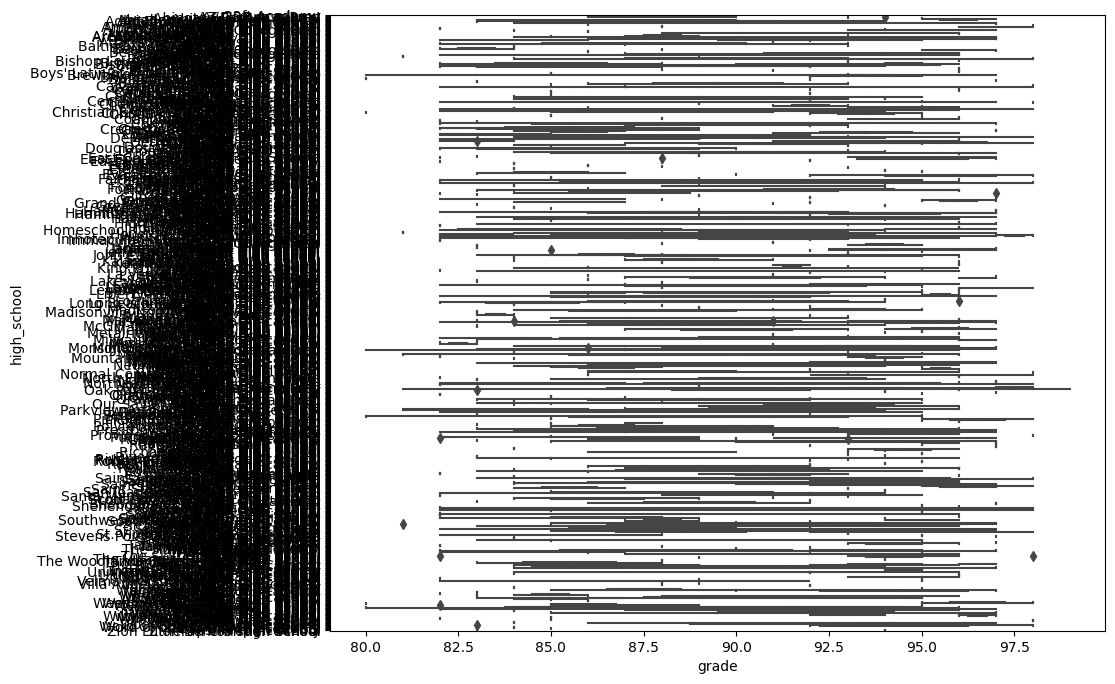

In [98]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('high_school'), x = "grade", y = "high_school");

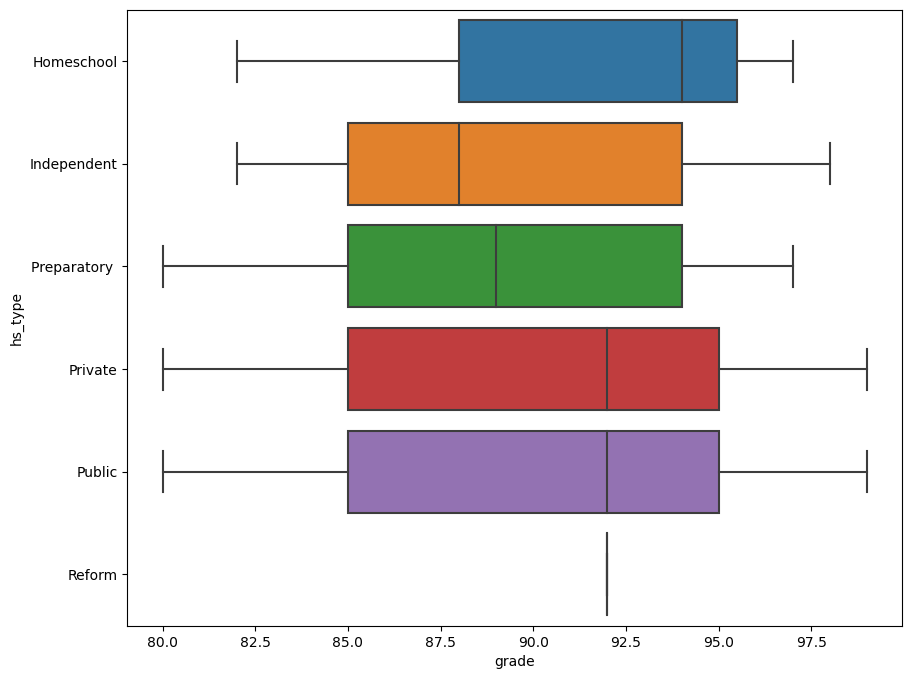

In [99]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_type'), x = "grade", y = "hs_type");

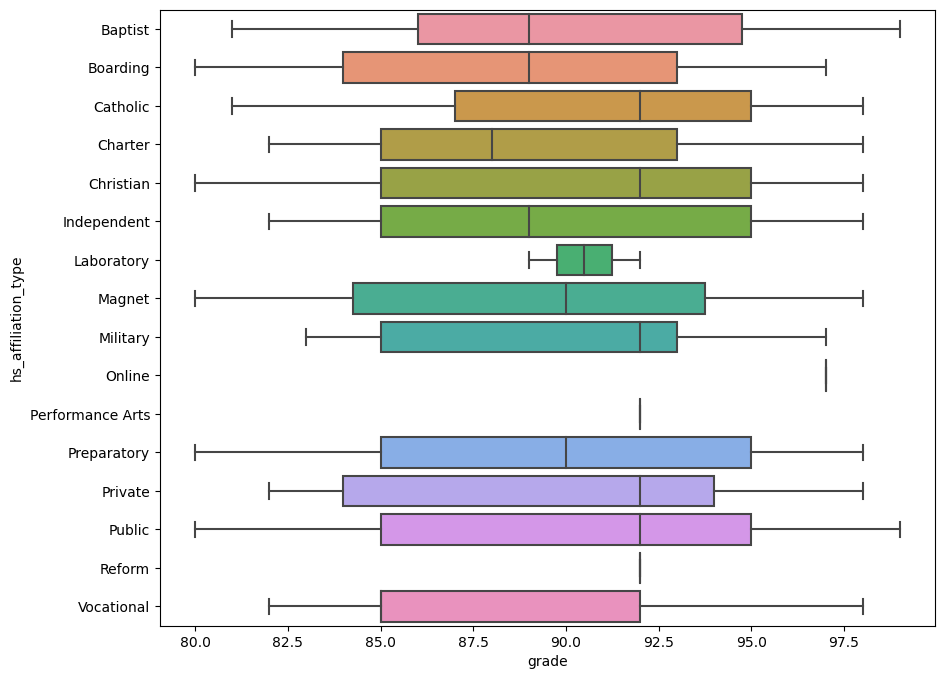

In [100]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hs_affiliation_type'), x = "grade", y = "hs_affiliation_type");

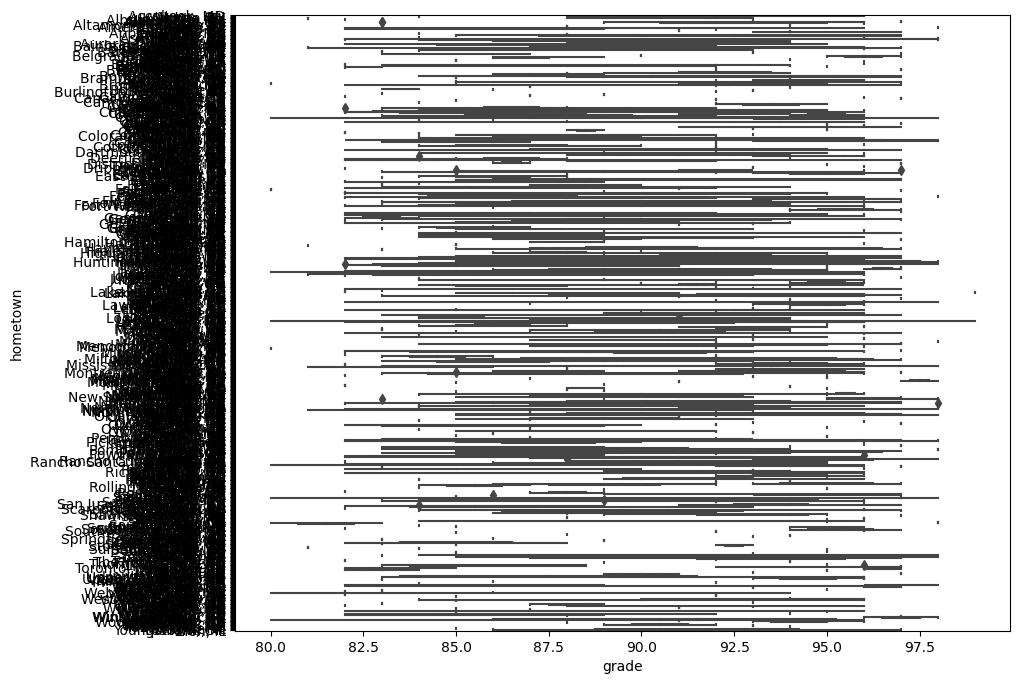

In [101]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('hometown'), x = "grade", y = "hometown");

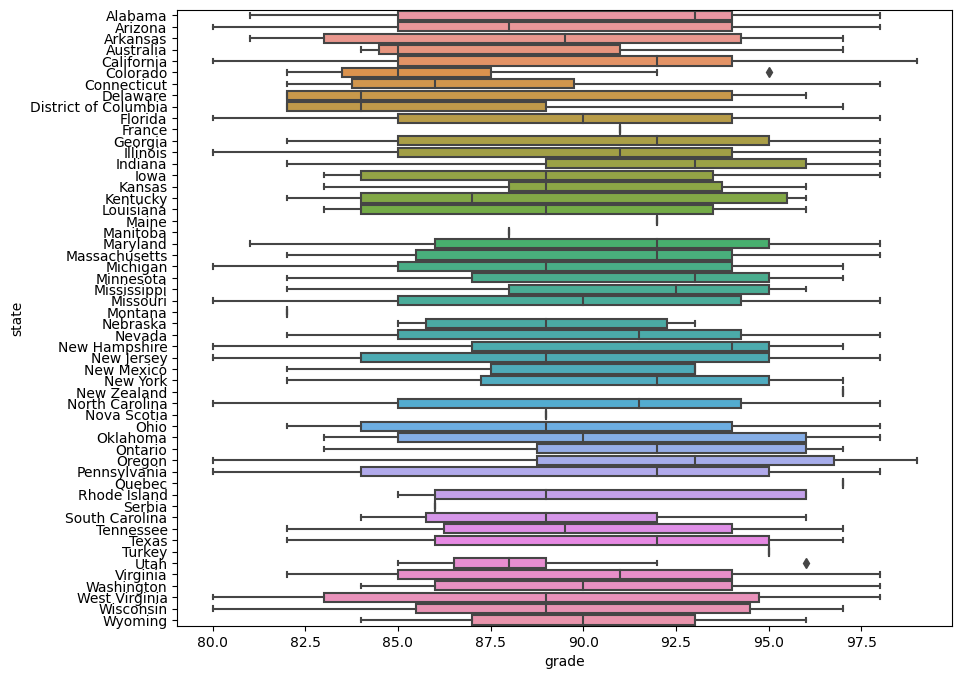

In [102]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('state'), x = "grade", y = "state");

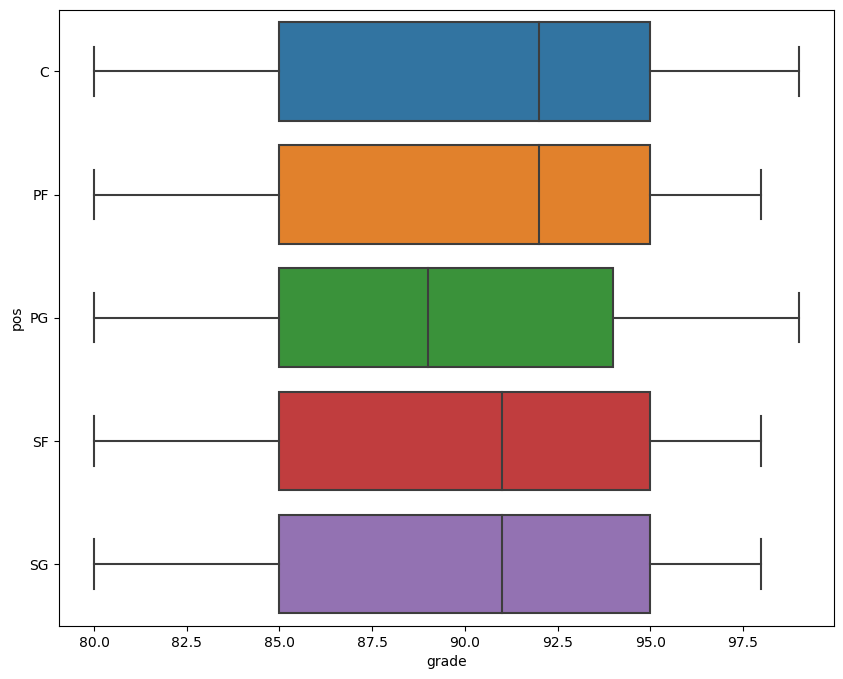

In [103]:
plt.figure(figsize = (10,8))

sns.boxplot(data = espn_100.sort_values('pos'), x = "grade", y = "pos");

# Height Vs Weight

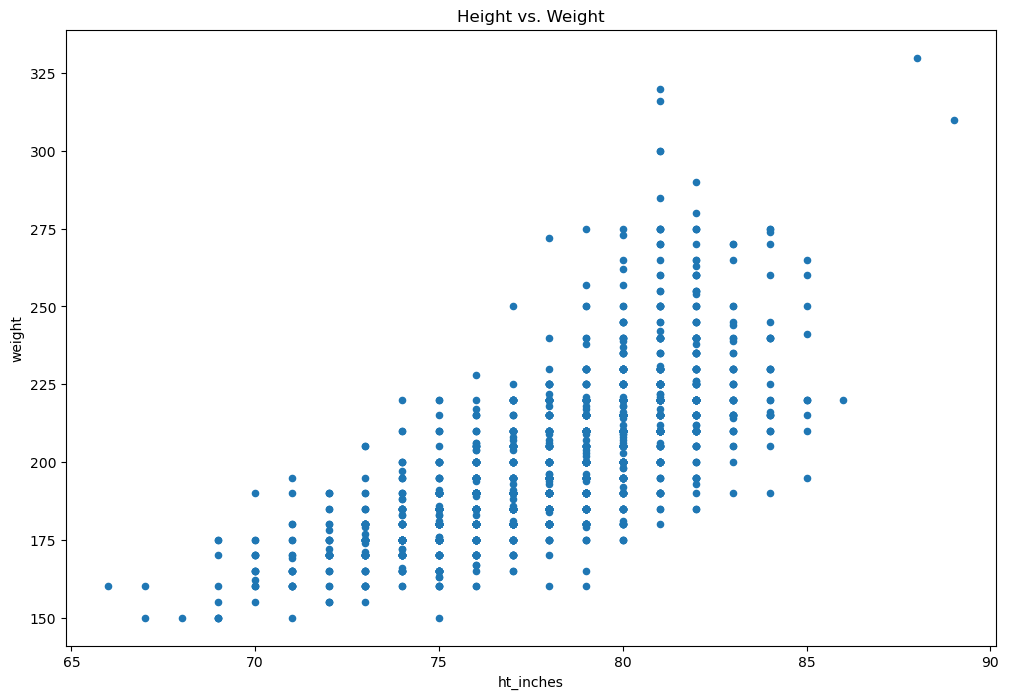

In [105]:
espn_100.plot(kind = 'scatter', x = 'ht_inches', y = 'weight', figsize = (12,8))
plt.title('Height vs. Weight');

In [106]:
espn_100[['ht_inches', 'weight']].cov()

,ht_inches,weight
ht_inches,10.486258,57.985834
weight,57.985834,621.921046


In [107]:
espn_100['ht_inches'].var()

10.48625757182918

In [108]:
espn_100['weight'].var()

621.9210464264127

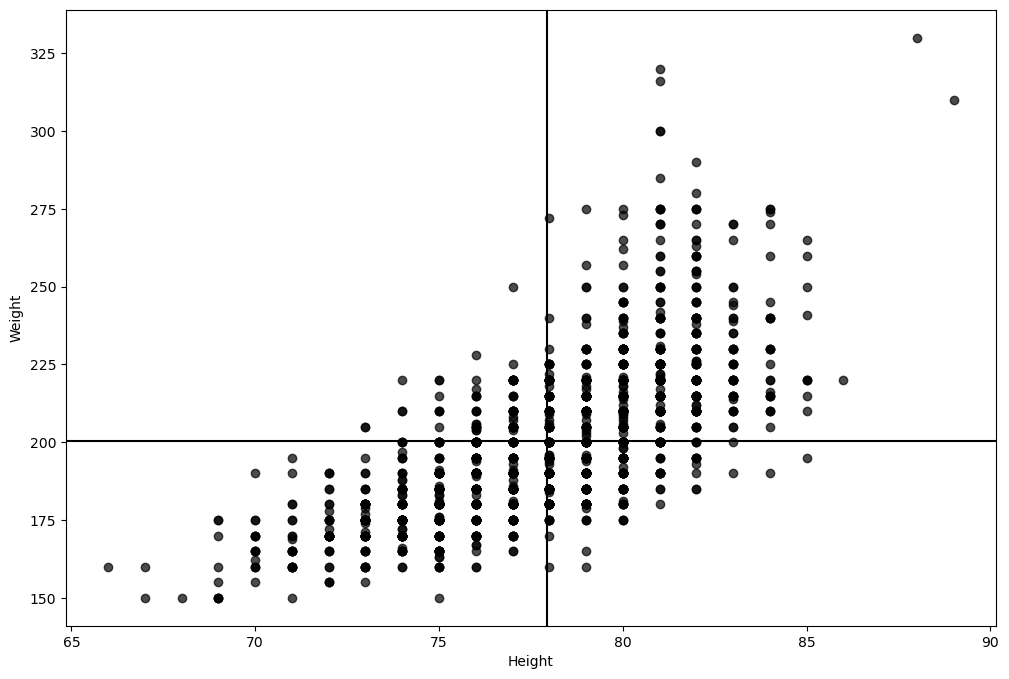

In [111]:
quadrant_plot(espn_100.ht_inches, espn_100.weight, labels = ['Height', 'Weight'], figsize = (12,8))

In [112]:
espn_100[['ht_inches', 'weight']].corr()

,ht_inches,weight
ht_inches,1.000000,0.720035
weight,0.720035,1.000000


# Other Statistics

In [113]:
espn_100.groupby('pos').corr(numeric_only=True)

class      rank  ht_inches    weight  \
pos                                                                     
C   class                     1.000000  0.023132   0.025108 -0.257455   
    rank                      0.023132  1.000000  -0.132990 -0.002795   
    ht_inches                 0.025108 -0.132990   1.000000  0.076911   
    weight                   -0.257455 -0.002795   0.076911  1.000000   
    stars                     0.044421 -0.777224   0.150145 -0.002842   
...                                ...       ...        ...       ...   
SG  squared_height_deviation  0.063159  0.151237  -0.921248 -0.222504   
    height_z-score           -0.075612 -0.167114   1.000000  0.244796   
    grade_deviation          -0.675982 -0.612205   0.117029  0.198915   
    squared_grade_deviation   0.074229  0.152905  -0.088936  0.008133   
    grade_z-score            -0.675982 -0.612205   0.117029  0.198915   

                                 stars     grade  weight_deviation  \
pos                                                                  
C   class                     0.044421 -0.581231         -0.257455   
    rank                     -0.777224 -0.672959         -0.002795   
    ht_inches                 0.150145  0.098378          0.076911   
    weight                   -0.002842  0.109764          1.000000   
    stars                     1.000000  0.619013         -0.002842   
...                                ...       ...               ...   
SG  squared_height_deviation -0.079036 -0.105195         -0.222504   
    height_z-score            0.083225  0.117029          0.244796   
    grade_deviation           0.506767  1.000000          0.198915   
    squared_grade_deviation  -0.127092 -0.215843          0.008133   
    grade_z-score             0.506767  1.000000          0.198915   

                              squared_weight_deviation  weight_z-score  \
pos                                                                      
C   class                                    -0.214554       -0.257455   
    rank                                      0.047382       -0.002795   
    ht_inches                                 0.135924        0.076911   
    weight                                    0.928776        1.000000   
    stars                                    -0.056787       -0.002842   
...                                                ...             ...   
SG  squared_height_deviation                  0.204575       -0.222504   
    height_z-score                           -0.216493        0.244796   
    grade_deviation                          -0.211479        0.198915   
    squared_grade_deviation                   0.042227        0.008133   
    grade_z-score                            -0.211479        0.198915   

                              height_deviation  squared_height_deviation  \
pos                                                                        
C   class                             0.025108                  0.016791   
    rank                             -0.132990                 -0.095180   
    ht_inches                         1.000000                  0.965044   
    weight                            0.076911                  0.141337   
    stars                             0.150145                  0.110058   
...                                        ...                       ...   
SG  squared_height_deviation         -0.921248                  1.000000   
    height_z-score                    1.000000                 -0.921248   
    grade_deviation                   0.117029                 -0.105195   
    squared_grade_deviation          -0.088936                  0.111458   
    grade_z-score                     0.117029                 -0.105195   

                              height_z-score  grade_deviation  \
pos                                                             
C   class                           0.025108        -0.581231   
    rank                 

In [114]:
espn_100.groupby('hs_type').corr(numeric_only=True)

class      rank  ht_inches  \
hs_type                                                                  
Homeschool class                     1.000000e+00  0.475421  -0.944911   
           rank                      4.754212e-01  1.000000  -0.737199   
           ht_inches                -9.449112e-01 -0.737199   1.000000   
           weight                   -9.607689e-01 -0.700771   0.998625   
           stars                     3.845925e-16 -0.879758   0.327327   
...                                           ...       ...        ...   
Reform     squared_height_deviation           NaN       NaN        NaN   
           height_z-score                     NaN       NaN        NaN   
           grade_deviation                    NaN       NaN        NaN   
           squared_grade_deviation            NaN       NaN        NaN   
           grade_z-score                      NaN       NaN        NaN   

                                       weight         stars     grade  \
hs_type                                                                 
Homeschool class                    -0.960769  3.845925e-16 -0.755929   
           rank                     -0.700771 -8.797583e-01 -0.935322   
           ht_inches                 0.998625  3.273268e-01  0.928571   
           weight                    1.000000  2.773501e-01  0.907841   
           stars                     0.277350  1.000000e+00  0.654654   
...                                       ...           ...       ...   
Reform     squared_height_deviation       NaN           NaN       NaN   
           height_z-score                 NaN           NaN       NaN   
           grade_deviation                NaN           NaN       NaN   
           squared_grade_deviation        NaN           NaN       NaN   
           grade_z-score                  NaN           NaN       NaN   

                                     weight_deviation  \
hs_type                                                 
Homeschool class                            -0.960769   
           rank                             -0.700771   
           ht_inches                         0.998625   
           weight                            1.000000   
           stars                             0.277350   
...                                               ...   
Reform     squared_height_deviation               NaN   
           height_z-score                         NaN   
           grade_deviation                        NaN   
           squared_grade_deviation                NaN   
           grade_z-score                          NaN   

                                     squared_weight_deviation  weight_z-score  \
hs_type                                                                         
Homeschool class                                     0.929937       -0.960769   
           rank                                      0.765615       -0.700771   
           ht_inches                                -0.999072        0.998625   
           weight                                   -0.995441        1.000000   
           stars                                    -0.367719        0.277350   
...                                                       ...             ...   
Reform     squared_height_deviation                       NaN             NaN   
           height_z-score                                 NaN             NaN   
           grade_deviation                                NaN             NaN   
           squared_grade_deviation                        NaN             NaN   
           grade_z-score                                  NaN             NaN   

                                     height_deviation  \
hs_type                                                 
Homeschool class                            -0.944911   
           rank                             -0.737199   
           ht_inches                         1.000000   
           weight                            0.998

In [115]:
espn_100.groupby('class').corr(numeric_only=True)

rank  ht_inches    weight     stars  \
class                                                                     
2007  rank                      1.000000  -0.013062 -0.125225       NaN   
      ht_inches                -0.013062   1.000000  0.726523       NaN   
      weight                   -0.125225   0.726523  1.000000       NaN   
      stars                          NaN        NaN       NaN       NaN   
      grade                    -0.937966  -0.015609  0.115186       NaN   
...                                  ...        ...       ...       ...   
2022  squared_height_deviation -0.026848  -0.022829  0.005669 -0.022517   
      height_z-score           -0.197276   1.000000  0.724639  0.101409   
      grade_deviation          -0.984057   0.207437  0.183616  0.790518   
      squared_grade_deviation   0.906570  -0.180148 -0.220805 -0.494261   
      grade_z-score            -0.984057   0.207437  0.183616  0.790518   

                                   grade  weight_deviation  \
class                                                        
2007  rank                     -0.937966         -0.125225   
      ht_inches                -0.015609          0.726523   
      weight                    0.115186          1.000000   
      stars                          NaN               NaN   
      grade                     1.000000          0.115186   
...                                  ...               ...   
2022  squared_height_deviation  0.007290          0.005669   
      height_z-score            0.207437          0.724639   
      grade_deviation           1.000000          0.183616   
      squared_grade_deviation  -0.870718         -0.220805   
      grade_z-score             1.000000          0.183616   

                                squared_weight_deviation  weight_z-score  \
class                                                                      
2007  rank                                     -0.061312       -0.125225   
      ht_inches                                 0.308865        0.726523   
      weight                                    0.654173        1.000000   
      stars                                          NaN             NaN   
      grade                                     0.107363        0.115186   
...                                                  ...             ...   
2022  squared_height_deviation                  0.414467        0.005669   
      height_z-score                           -0.096004        0.724639   
      grade_deviation                          -0.086378        0.183616   
      squared_grade_deviation                   0.011582       -0.220805   
      grade_z-score                            -0.086378        0.183616   

                                height_deviation  squared_height_deviation  \
class                                                                        
2007  rank                             -0.013062                 -0.065412   
      ht_inches                         1.000000                 -0.213400   
      weight                            0.726523                 -0.080834   
      stars                                  NaN                       NaN   
      grade                            -0.015609                  0.060720   
...                                          ...                       ...   
2022  squared_height_deviation         -0.022829                  1.000000   
      height_z-score                    1.000000                 -0.022829   
      grade_deviation                   0.207437                  0.007290   
      squared_grade_deviation          -0.180148                 -0.025489   
      grade_z-score                     0.207437                  0.007290   

                                height_z-score  grade_deviation  \
class                                                             
2007  rank                           -0.013062        -0.937966   
      ht_inches                       1.000000  

In [116]:
espn_100.groupby('hometown').corr(numeric_only=True)

class  rank  ht_inches  weight  stars  \
hometown                                                                       
Accokeek, MD class                       1.0  -1.0        1.0     1.0    NaN   
             rank                       -1.0   1.0       -1.0    -1.0    NaN   
             ht_inches                   1.0  -1.0        1.0     1.0    NaN   
             weight                      1.0  -1.0        1.0     1.0    NaN   
             stars                       NaN   NaN        NaN     NaN    NaN   
...                                      ...   ...        ...     ...    ...   
Zion, IL     squared_height_deviation    NaN   NaN        NaN     NaN    NaN   
             height_z-score              NaN   NaN        NaN     NaN    NaN   
             grade_deviation             NaN   NaN        NaN     NaN    NaN   
             squared_grade_deviation     NaN   NaN        NaN     NaN    NaN   
             grade_z-score               NaN   NaN        NaN     NaN    NaN   

                                       grade  weight_deviation  \
hometown                                                         
Accokeek, MD class                      -1.0               1.0   
             rank                        1.0              -1.0   
             ht_inches                  -1.0               1.0   
             weight                     -1.0               1.0   
             stars                       NaN               NaN   
...                                      ...               ...   
Zion, IL     squared_height_deviation    NaN               NaN   
             height_z-score              NaN               NaN   
             grade_deviation             NaN               NaN   
             squared_grade_deviation     NaN               NaN   
             grade_z-score               NaN               NaN   

                                       squared_weight_deviation  \
hometown                                                          
Accokeek, MD class                                         -1.0   
             rank                                           1.0   
             ht_inches                                     -1.0   
             weight                                        -1.0   
             stars                                          NaN   
...                                                         ...   
Zion, IL     squared_height_deviation                       NaN   
             height_z-score                                 NaN   
             grade_deviation                                NaN   
             squared_grade_deviation                        NaN   
             grade_z-score                                  NaN   

                                       weight_z-score  height_deviation  \
hometown                                                                  
Accokeek, MD class                                1.0               1.0   
             rank                                -1.0              -1.0   
             ht_inches                            1.0               1.0   
             weight                               1.0               1.0   
             stars                                NaN               NaN   
...                                               ...               ...   
Zion, IL     squared_height_deviation             NaN               NaN   
             height_z-score                       NaN               NaN   
             grade_deviation                      NaN               NaN   
             squared_grade_deviation              NaN               NaN   
             grade_z-score                        NaN               NaN   

                                       squared_height_deviation  \
hometown                                                          
Accokeek, MD class                                         -1.0   
             rank                                           1.0   
             ht_inches 

In [117]:
espn_100.groupby('state').corr(numeric_only=True)

class      rank  ht_inches    weight  \
state                                                                       
Alabama class                     1.000000 -0.021266  -0.009906 -0.057798   
        rank                     -0.021266  1.000000   0.002680 -0.125715   
        ht_inches                -0.009906  0.002680   1.000000  0.785856   
        weight                   -0.057798 -0.125715   0.785856  1.000000   
        stars                     0.390949 -0.795323  -0.025970  0.112795   
...                                    ...       ...        ...       ...   
Wyoming squared_height_deviation  1.000000  1.000000   1.000000       NaN   
        height_z-score            1.000000  1.000000   1.000000       NaN   
        grade_deviation          -1.000000 -1.000000  -1.000000       NaN   
        squared_grade_deviation   1.000000  1.000000   1.000000       NaN   
        grade_z-score            -1.000000 -1.000000  -1.000000       NaN   

                                     stars     grade  weight_deviation  \
state                                                                    
Alabama class                     0.390949 -0.568533         -0.057798   
        rank                     -0.795323 -0.648892         -0.125715   
        ht_inches                -0.025970 -0.123631          0.785856   
        weight                    0.112795  0.012877          1.000000   
        stars                     1.000000  0.476378          0.112795   
...                                    ...       ...               ...   
Wyoming squared_height_deviation       NaN -1.000000               NaN   
        height_z-score                 NaN -1.000000               NaN   
        grade_deviation                NaN  1.000000               NaN   
        squared_grade_deviation        NaN -1.000000               NaN   
        grade_z-score                  NaN  1.000000               NaN   

                                  squared_weight_deviation  weight_z-score  \
state                                                                        
Alabama class                                     0.016833       -0.057798   
        rank                                     -0.060341       -0.125715   
        ht_inches                                 0.231871        0.785856   
        weight                                    0.574967        1.000000   
        stars                                    -0.017788        0.112795   
...                                                    ...             ...   
Wyoming squared_height_deviation                       NaN             NaN   
        height_z-score                                 NaN             NaN   
        grade_deviation                                NaN             NaN   
        squared_grade_deviation                        NaN             NaN   
        grade_z-score                                  NaN             NaN   

                                  height_deviation  squared_height_deviation  \
state                                                                          
Alabama class                            -0.009906                 -0.047789   
        rank                              0.002680                  0.214913   
        ht_inches                         1.000000                 -0.303287   
        weight                            0.785856                 -0.066774   
        stars                            -0.025970                 -0.133012   
...                                            ...                       ...   
Wyoming squared_height_deviation          1.000000                  1.000000   
        height_z-score                    1.000000                  1.000000   
        grade_deviation                  -1.000000                 -1.000000   
        squared_grade_deviation           1.000000                  1.000000   
        grade_z-score                    -1.000000                 -1.000000   

                

In [118]:
espn_100.groupby(['pos','school'])['grade'].describe()

count       mean       std   min   25%   50%    75%   max
pos school                                                                  
C   Akron            1.0  92.000000       NaN  92.0  92.0  92.0  92.00  92.0
    Alabama          3.0  85.666667  2.081666  84.0  84.5  85.0  86.50  88.0
    Arizona          6.0  92.166667  6.431692  81.0  89.5  95.0  96.75  97.0
    Arizona St       1.0  82.000000       NaN  82.0  82.0  82.0  82.00  82.0
    Arkansas         3.0  86.000000  3.464102  82.0  85.0  88.0  88.00  88.0
...                  ...        ...       ...   ...   ...   ...    ...   ...
SG  Virginia         6.0  91.000000  4.732864  83.0  89.0  92.5  93.75  96.0
    Virginia Tech    8.0  89.750000  5.338539  83.0  85.5  90.0  93.75  96.0
    Wake Forest      3.0  92.333333  3.055050  89.0  91.0  93.0  94.00  95.0
    Washington       5.0  88.400000  4.277850  84.0  86.0  86.0  93.00  93.0
    Xavier           5.0  85.200000  5.540758  82.0  82.0  83.0  84.00  95.0

[420 rows x 8 columns]

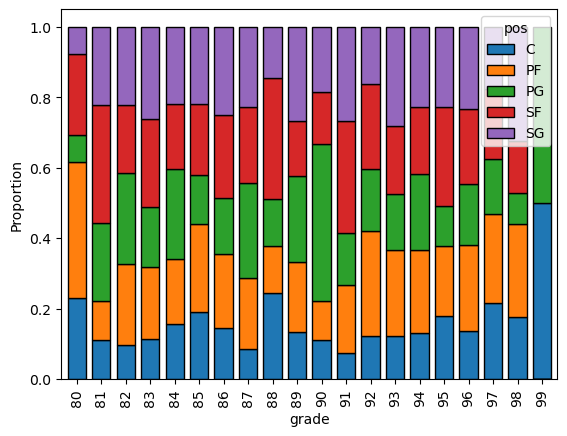

In [119]:
pd.crosstab(espn_100['grade'], 
            espn_100['pos'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

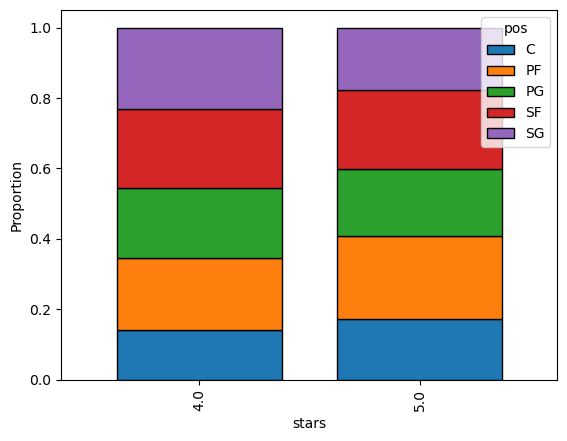

In [120]:
pd.crosstab(espn_100['stars'], 
            espn_100['pos'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

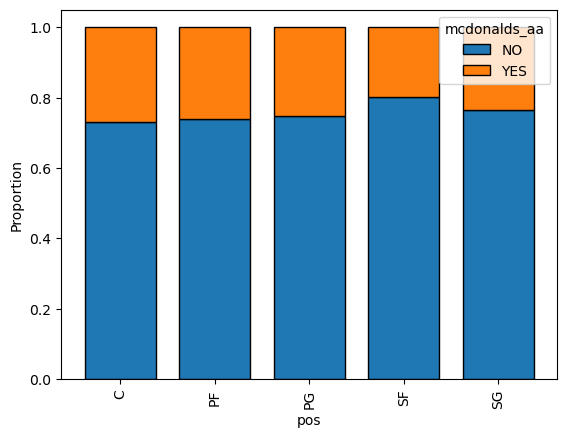

In [121]:
pd.crosstab(espn_100['pos'], 
            espn_100['mcdonalds_aa'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

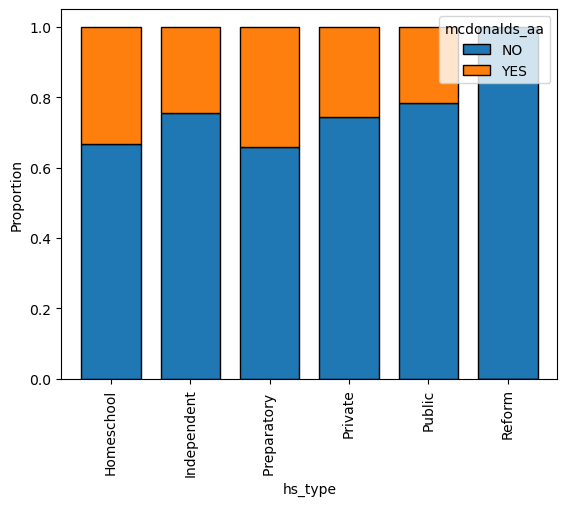

In [122]:
pd.crosstab(espn_100['hs_type'], 
            espn_100['mcdonalds_aa'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

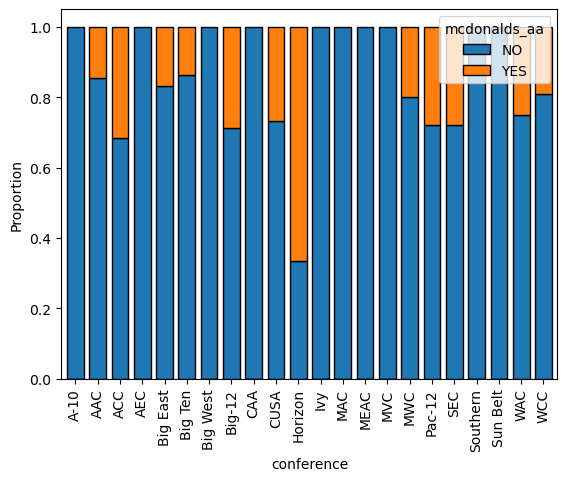

In [123]:
pd.crosstab(espn_100['conference'], 
            espn_100['mcdonalds_aa'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

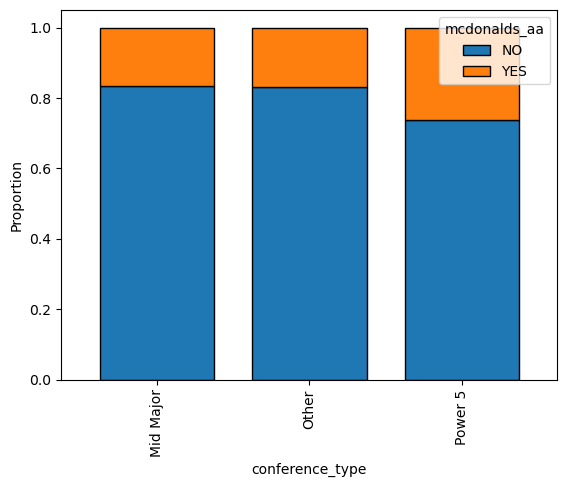

In [124]:
pd.crosstab(espn_100['conference_type'], 
            espn_100['mcdonalds_aa'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

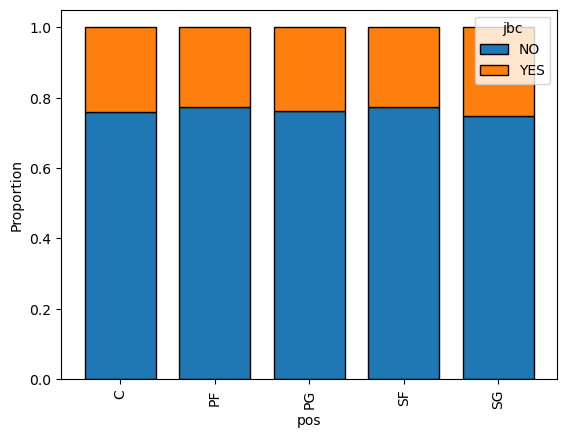

In [125]:
pd.crosstab(espn_100['pos'], 
            espn_100['jbc'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

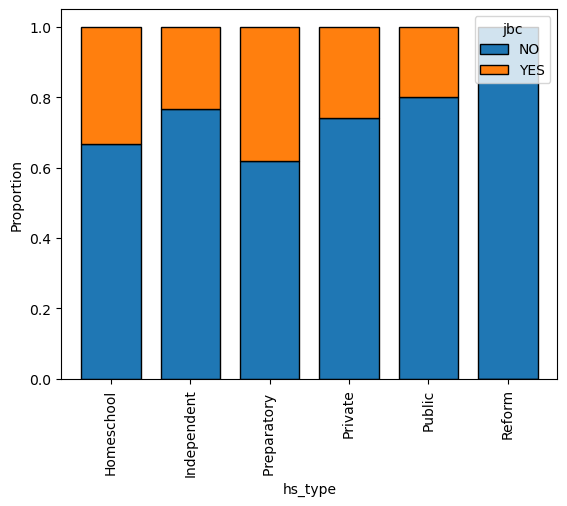

In [126]:
pd.crosstab(espn_100['hs_type'], 
            espn_100['jbc'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

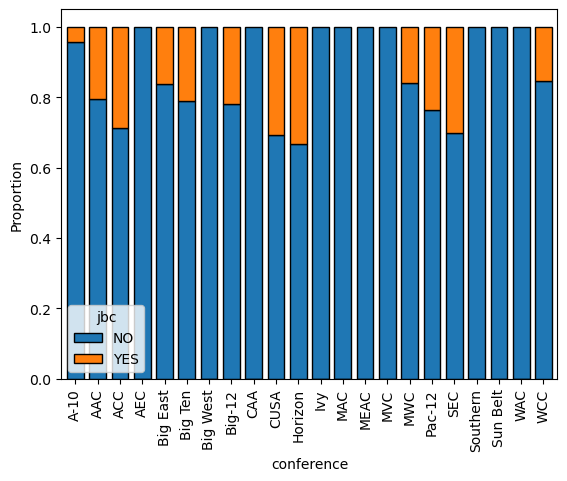

In [127]:
pd.crosstab(espn_100['conference'], 
            espn_100['jbc'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');

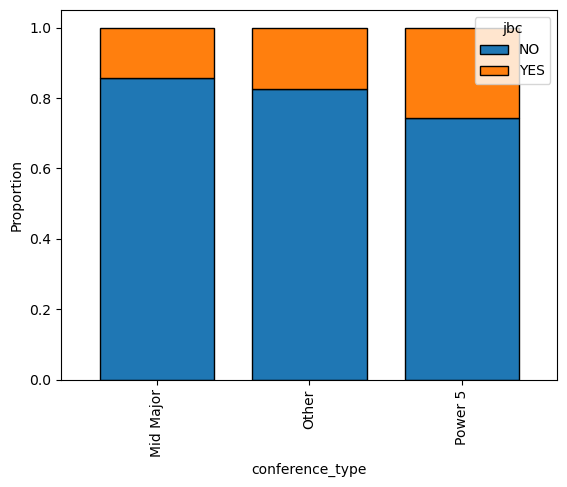

In [128]:
pd.crosstab(espn_100['conference_type'], 
            espn_100['jbc'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');